# Applied Data Science (STAT GR 5243) Project 1: Flight Delay Analysis

**Team 14:** Helena Li (yl6029), Crystal Guo (lg3434), Nikhil Shanbhag (nvs2128), Yijing Zhang (yz5049)


# Introduction and Dataset Description

## 1. Introduction

Flight delays represent a major operational and economic challenge in the aviation industry, affecting airline efficiency, passenger commutes, and overall transportation reliability. Delays can arise from a wide range of factors, including airport congestion, weather disruptions, aircraft availability, and air traffic control constraints, among others.

The goal of this project is to explore patterns in flight delays and develop a dataset suitable for statistical analysis and predictive modeling. This involves transforming flight-level operational records into a structured  dataset and engineering features that capture temporal patterns, operational mechanisms, and differences across routes, airports, and carriers. The resulting dataset supports EDA, delay classification tasks, and modeling aimed at identifying the key drivers of flight delays.

---

## 2. Dataset Description

The dataset consists of detailed records for over 7 million commercial flight delays within the US during the year 2024. Each observation represents a single flight leg and includes information on scheduling, timing, distance, and delay outcomes.

The dataset contains several categories of features (35 in total). Here is a more comprehensive overview of the most important features:

**Scheduling and timing variables**, including:

- `fl_date`: flight date

- `crs_dep_time` and `crs_arr_time`: scheduled departure and arrival times

- `dep_time` and `arr_time`: actual departure and arrival times

- `crs_elapsed_time`: scheduled gate-to-gate duration

- `actual_elapsed_time`: actual gate-to-gate duration

- `air_time`: time spent in the air

These variables help us measure delay outcomes and operational efficiency.

**Ground and operational variables**, including:

- `taxi_out` and `taxi_in`: taxi times before takeoff and after landing

- `distance`: flight distance in miles

These help us capture airport congestion and route characteristics.

**Delay outcome variables**, including:

- `dep_delay`: departure delay in minutes

- `arr_delay`: arrival delay in minutes

These represent the primary outcomes of interest.

**Delay attribution variables**, including:

- `carrier_delay`

- `weather_delay`

- `nas_delay`

- `security_delay`

- `late_aircraft_delay`

These variables break down total delay into different categories and provide insight into the reason behind why they happened.

**Contextual variables**, including:

- `origin`: origin airport code

- `dest`: destination airport code

- `op_unique_carrier`: airline identifier

These variables allow analysis of differences across airports, routes, and carriers.

Each row in the dataset represents one completed flight leg. Time variables are recorded in local airport time, and delay attribution fields represent the number of delay minutes attributed to each cause.


# Dataset Acquisition Methodology

The flight dataset used in this project was obtained from Kaggle as a CSV file, titled **“Flight Data 2024,”** made available by user Hrishit Patil and accessible at the following link: https://www.kaggle.com/datasets/hrishitpatil/flight-data-2024.

This dataset provides detailed records for domestic commercial flights in the US and is derived from the U.S. Department of Transportation’s Bureau of Transportation Statistics (BTS) On-Time Performance reporting system. The BTS database compiles operational information reported directly by airlines, including scheduled and actual departure and arrival times, delay durations, and delay attribution categories. As a result, the dataset reflects real-world airline operations, and the features make it well suited for analyzing flight delay patterns and for developing predictive models of delay outcomes.

# Cleaning and Preprocessing Steps


## Part 1: Date Variables Cleaning and Validation

In this part, the date-related variables were examined and cleaned, including:

- `year`
- `month`
- `day_of_month`
- `day_of_week`
- `fl_date`

### Dataset Overview

The structure of the dataset was first inspected using the `.info()` and `.shape` functions.

The dataset contains **7,079,081 rows and 35 columns**, indicating a very large dataset. Due to its size, the full dataset was not uploaded to GitHub, and only a sample of the dataset was shared.

Missing values and duplicate records were also checked. No duplicate rows were found in the dataset. Missing values were present in some operational variables but not in the date-related variables examined in this part.

---

### Range Validation of Date Components

The variables `year`, `month`, `day_of_month`, and `day_of_week` were examined to ensure that all values fall within valid ranges.

Specifically:

- `month` was checked to confirm all values are between **1 and 12**.
- `day_of_month` was verified to be between **1 and 31**.
- `day_of_week` was checked to ensure values are between **1 and 7**.

No abnormal values were detected in these variables.

---

### Date Formatting and Consistency Check

The variable `fl_date` was converted into a standardized date format (`YYYY-MM-DD`).

To ensure consistency, the `year`, `month`, and `day_of_month` components extracted from `fl_date` were compared with the original variables.

This verification confirmed that no inconsistencies were found, indicating that the date information in the dataset is accurate and internally consistent.

---

### Summary

In summary, the date-related variables were verified for:

- correct data types,
- valid value ranges,
- absence of missing values,
- absence of duplicate records,
- and consistency between combined and individual date components.

These checks ensure that the date variables are clean, correctly formatted, and reliable for further analysis.

---

## Part 2-1: Carrier Code and Flight Number Cleaning and Validation

In this part, the carrier-related variables were examined and cleaned, including:

- `op_unique_carrier`
- `op_carrier_fl_num`

---

### Format validation of carrier identifiers

The variable `op_unique_carrier` was validated against official airline carrier code rules, which require a **two-character** code. Specifically:

- Missing values were checked.
- Non-missing values were checked to confirm the code length is exactly **2**. Missing count was 0, and all entries satisfied the two-character constraint, so `op_unique_carrier` was retained unchanged as a categorical identifier.

---

### Missing-value resolution and range validation for flight numbers

The variable `op_carrier_fl_num` was treated as an identifier and validated using integer and range constraints. Specifically:

- Missing values were checked.
- Values were checked to be integer-valued. Values were checked to be within the four-digit bound **0–9999**. One missing value was detected and was replaced with the verified official flight number `2483` for that record. This correction was required because statistical imputation would produce a value that does not correspond to a real flight identifier. After the correction, the column satisfied the missingness and four-digit constraints.

---

### Summary

`op_unique_carrier` met the two-character code rule and required no changes.

`op_carrier_fl_num` had one missing entry, resolved by an official-record correction to `2483`.

Both variables were left in valid identifier formats for downstream analysis.

---

## Part 2-2: Origin and Destination Location Variables Cleaning and Validation

In this part, the location-related variables were examined and cleaned, including:

- `origin`, `origin_city_name`, `origin_state_nm`
- `dest`, `dest_city_name`, `dest_state_nm`
---

### Airport code format validation

The variables `origin` and `dest` were checked for missingness and for the required **three-character** airport code format. All values were non-missing and had length 3, so no corrections were required.


---

### City and state parsing, standardisation, and validation

The variables `origin_city_name` and `dest_city_name` were first checked for missingness, and no missing values were detected.

Each city field was then standardised by splitting the combined string `"City, ST"` into two components: the cleaned city name stored back into `origin_city_name` and `dest_city_name`, and a new variable (`origin_state_abbr`, `dest_state_abbr`) containing the two-letter state abbreviation (e.g., `"New York, NY"` → `origin_city_name = "New York"`, `origin_state_abbr = "NY"`).

This transformation was required because modelling and analysis often need separate city and state fields, and keeping them combined reduces grouping accuracy and feature usability. The extracted abbreviations were validated against a fixed list of allowed US state and territory abbreviations; all extracted values were in the allowed list, so no additional fixes were needed.


---

### State name validation

The variables `origin_state_nm` and `dest_state_nm` were checked for missingness and validated against a predefined list of allowed full state and territory names. All values were present and matched the allowed list, so the fields were retained unchanged.

---

### Summary

-  `origin` and `dest` satisfied the three-character airport code rule, with no missing values.
-  `origin_city_name` and `dest_city_name` were split into city and state abbreviation to create `origin_state_abbr` and `dest_state_abbr`, improving geographic feature usability.
-  State abbreviations and full state names were validated against allowed lists, with no invalid entries detected.

---
## Part 3: Departure and Arrival Time Cleaning and Validation

In this part, all departure and arrival-related time variables were cleaned and validated, including:

- Departure-related variables:
  - `crs_dep_time`
  - `dep_time`
  - `dep_delay`
  - `taxi_out`
  - `taxi_in`
  - `cancelled`

- Arrival-related variables:
  - `wheels_off`
  - `wheels_on`
  - `crs_arr_time`
  - `arr_time`
  - `arr_delay`

---

### Missing Value Handling and Logical Consistency

Missing values were first examined for scheduled departure time (`crs_dep_time`). No missing values were found in this variable.

For cancelled flights (`cancelled = 1`), operational variables such as `dep_delay`, `taxi_out`, and `taxi_in` are not applicable. Therefore, these values were set to missing (`NaN`) to maintain logical consistency, since these operations do not occur for cancelled flights.

Taxi time variables (`taxi_out` and `taxi_in`) were also checked to ensure they were non-negative, as taxi duration cannot be negative. Any negative values were flagged as invalid.

---

### Time Format Standardization

The time variables:

- `crs_dep_time`
- `dep_time`
- `wheels_off`
- `wheels_on`
- `crs_arr_time`
- `arr_time`

were originally stored in HHMM numeric format and required conversion into standardized time format.

The following cleaning steps were performed:

- Numeric HHMM values were converted into four-digit strings using zero-padding.
- The values were converted into `"HH:MM"` format.
- Temporary columns were created during conversion to ensure safe processing.
- After verification, the cleaned values replaced the original variables.
- The variables were then converted into proper time-type format.

This ensured consistent formatting and improved interpretability across all time variables.

---

### Departure Delay Consistency Check

The departure delay variable (`dep_delay`) was validated by comparing it with the difference between actual departure time (`dep_time`) and scheduled departure time (`crs_dep_time`).

Since only clock time was available and not full date information, delays spanning multiple days were accounted for by allowing differences equal to multiples of 1440 minutes (24 hours).

Records that did not satisfy this condition were flagged as potential inconsistencies.

This approach ensures logical consistency while preserving original data.

---

### Arrival Delay Consistency Check

Similarly, the arrival delay variable (`arr_delay`) was validated by comparing it with the difference between actual arrival time (`arr_time`) and scheduled arrival time (`crs_arr_time`).

Due to the absence of full date information, delays spanning multiple days were also accounted for using multiples of 1440 minutes.

Records that did not satisfy this relationship were flagged as potential inconsistencies.

---

### Summary

Through these cleaning and validation procedures, departure and arrival time variables were successfully standardized and verified.

The process included:

- handling missing values for cancelled flights,
- converting HHMM format into standardized time format,
- ensuring logical consistency between scheduled time, actual time, and delay variables,
- and identifying invalid or inconsistent records.

These steps improve the accuracy, consistency, and reliability of time-related operational variables, ensuring the dataset is suitable for further analysis and modeling.

---
## Part 4: Cancellation and Diversion Variables Cleaning and Validation

In this part, the disruption-related variables were examined and cleaned, including:

- `cancelled`
- `cancellation_code`
- `diverted`
---
### Binary indicator validation for cancellations
The variable `cancelled` was checked to confirm it only contains valid binary values (**0** or **1**). All values satisfied this constraint.

To enforce internal consistency, operational time and delay fields that are undefined when a flight is cancelled were set to missing for records with `cancelled = 1` (`dep_time`, `dep_delay`, `taxi_out`, `wheels_off`, `wheels_on`, `taxi_in`, `arr_time`, `arr_delay`, `actual_elapsed_time`, `air_time`), because these quantities do not exist when the flight does not operate.

---

### Consistency validation for cancellation codes
The variable `cancellation_code` was validated against `cancelled` using two rules: it must be present when `cancelled = 1`, and it must be missing when `cancelled = 0`.

The audit found no violations of these rules. In addition, non-missing values were checked to ensure they fall within the allowed set `{A, B, C, D}`, and all observed codes satisfied this constraint.

---

### Binary indicator validation and logical consistency for diversions
The variable `diverted` was checked to confirm it only contains valid binary values (**0** or **1**). A logical consistency check was then applied to ensure `diverted = 1` does not occur together with `cancelled = 1`, since a flight cannot both be cancelled and diverted. No inconsistent records were detected, so no corrections were required.

---

### Summary

- `cancelled`, `cancellation_code`, and `diverted` satisfied their binary or allowed-category rules.
- Time and delay fields were set to missing for cancelled flights to enforce operational meaning.
- Cross-field checks found no conflicts between cancellation status, cancellation codes, and diversion status.
---

## Part 5: Flight Duration, Air Time, Wheels Timing, and Distance Cleaning and Validation

In this part, the duration and timing variables were examined and cleaned, including:

- `crs_elapsed_time`, `actual_elapsed_time`, `air_time`
- `wheels_off`, `wheels_on`
- `distance`

---

### Scheduled elapsed time validation and correction

The variable `crs_elapsed_time` was checked to ensure it is **non-missing** and **greater than or equal to 0**, since scheduled duration cannot be negative and should be defined for scheduled flights. The audit identified **one missing value** and **one negative value**. The missing scheduled duration was corrected by manually computing the scheduled time difference from the corresponding scheduled departure and arrival times (BWI → SJU, 18:00 to 22:52), yielding **292.0 minutes**, which was written back into `crs_elapsed_time`.

The negative value could not be verified against an official record with the available information, so the affected row was removed because a negative scheduled duration is a structurally invalid data point and cannot be repaired reliably.

---

### Actual elapsed time and air time validation

The variables `actual_elapsed_time` and `air_time` were checked to ensure values are **greater than or equal to 0** for non-cancelled flights, with cancelled flights handled separately in the cancellation cleaning step. Both variables contained **no missing values** under the required conditions and **no negative values**, so no corrections were required.

---

### Wheels timing consistency for non-cancelled flights

The wheels timing variables (`wheels_off`, `wheels_on`) were validated through a consistency check tied to cancellation status: for records with `cancelled = 0`, timing information must be present and compatible with non-missing elapsed time fields. The check found **no records** where `cancelled = 0` but required timing-linked fields were missing, so no corrections were required.

---

### Distance validation

The variable `distance` was checked for missingness and for non-negativity, since route distance cannot be negative. The audit found **no missing values** and **no negative values**, so the variable was retained unchanged.

---

### Summary

- `crs_elapsed_time` contained one missing and one negative value; the missing value was repaired by manual duration calculation (292 minutes) and the negative record was removed as invalid.
- `actual_elapsed_time`, `air_time`, wheels timing consistency, and `distance` passed missingness and non-negativity checks with no corrections needed.


---
## Part 6: Delay Component Cleaning and Consistency Validation

In this part, the delay component variables were examined and validated, including:

- `carrier_delay`
- `weather_delay`
- `nas_delay`
- `security_delay`
- `late_aircraft_delay`

These variables represent the contribution of different factors to the total arrival delay (`arr_delay`).

---

### Negative Value Validation

Since delay duration cannot be negative, all delay component variables were examined for negative values.

Records containing negative delay components were identified and flagged as data quality issues.

This step ensures that all delay duration values remain logically valid.

---

### Consistency Check with Total Arrival Delay

To verify logical consistency, the sum of the five delay component variables was compared with the total arrival delay (`arr_delay`).

This check was performed for flights with positive arrival delay (`arr_delay > 0`).

A consistency indicator variable, `arr_delay_consistent`, was created to identify whether:
(`carrier_delay` + `weather_delay` + `nas_delay` + `security_delay` + `late_aircraft_delay` = `arr_delay`)

Records where the values matched were marked as consistent, while mismatched records were flagged as inconsistent.

---

### Investigation of Inconsistent Records

A large number of records showed inconsistency between component delays and total arrival delay.

Further investigation showed that many of these inconsistencies were associated with missing values in one or more delay component variables.

Additionally, in many cases, the sum of component delays was less than the total arrival delay.

This indicates that not all delay minutes were assigned to specific delay categories, which is common in real-world flight operation data.

---

### Handling Strategy

Instead of modifying the original delay values, the dataset was updated by adding a consistency indicator variable (`arr_delay_consistent`) to flag inconsistent records.

This approach preserves original operational information while allowing inconsistent records to be identified and handled appropriately in later analysis.

---

### Summary

Through this cleaning process, delay component variables were validated to ensure logical correctness and consistency.

The process included:

- identifying invalid negative delay values,
- verifying consistency between component delays and total delay,
- and flagging inconsistent records without modifying original data.

These steps improve data quality while maintaining data integrity for further analysis and modeling.



# Feature Engineering Process and Justification

## 1. Feature Engineering Process Overview

The objective of the feature engineering phase was to transform the cleaned flight-level dataset and prepare it for EDA along with a modeling-ready table that more effectively captures the structure and mechanisms of flight delays. Rather than relying solely on the raw operational variables, this phase introduced derived features designed to represent temporal structure, operational performance, contextual baselines, delay mechanisms, and handling of extreme values (outliers).

The feature engineering strategy was guided by both statistical considerations and domain knowledge. It focused on extracting meaningful time-based patterns, decomposing delay outcomes into interpretable components, capturing systematic differences across routes, airports, and carriers, and stabilizing heavy-tailed variables without removing meaningful disruption events. The resulting dataset provides a richer representation of flight performance and is suitable for downstream EDA, reporting, and predictive modeling.

---

## 2. Cleaned Dataset and Assumptions

The dataset provided after cleaning includes core operational and delay columns such as scheduled/actual times, taxi times, elapsed times, cancellations/diversions, distance, and delay attributions (`carrier_delay`, `weather_delay`, `nas_delay`, `security_delay`, `late_aircraft_delay`). In addition, the cleaning process standardized column names and filled missing values in delay attribution columns with 0, consistent with our interpretation that missing values indicate no minutes attributed to that cause.

A key assumption used during feature engineering is that the dataset represents **one row per flight leg**, and times are in **local airport time**. Extreme values in delay-related outcomes such as weather wevents are often meaningful and thus should not be removed as “errors” unless they violate physical constraints. However, this was handled during the cleaning phase.

---

## 3. Time and Calendar Features

Temporal structure is a major indicator of flight performance, as delays vary systematically by time of day, day of week, and season. To capture these patterns, the flight date variable (`fl_date`) was converted into a standardized datetime format. This conversion allows us to extract additional calendar-based features.

The day of the week was extracted as a categorical variable (`day_name`), and a binary indicator (`is_weekend`) was created to distinguish weekday vs. weekend flights. In addition, each flight was assigned to a seasonal category (`season`) based on its month. These features allow analysis of systematic temporal variation in flight performance, such as increased delays during winter due to weather or shifts in travel demand across the week.

The scheduled departure time (`crs_dep_time`) was also used to extract the scheduled departure hour (`scheduled_dep_hour`), which provides a measure of time-of-day effects. A corresponding binary indicator (`is_peak_hour`) was constructed to identify flights scheduled during high-traffic peak periods. These features are helpful in understanding congestion patterns and support EDA/predictive modeling.

---

## 4. Delay Outcome Features

To improve interpretability and support classification analyses, additional features were created to represent delay outcomes more clearly. Binary indicators were constructed for departure and arrival delays (`is_dep_delayed` and `is_arr_delayed`), defined as delays exceeding 15 minutes. This threshold aligns with standard practice, where small timing deviations can simply be treated as noise.

In addition, a categorical delay severity variable (`delay_bucket`) was created to classify flights into on-time, minor delay, major delay, and extreme delay categories. Delay distributions are highly skewed and heavy-tailed, so categorical grouping improves interpretability and allows analysis of disruption frequency rather than relying solely on averages.

These outcome-based features provide a clearer representation of operational performance.

---

## 5. Operational Decomposition and Efficiency Metrics

A central goal of the feature engineering process was to create features that capture operational mechanisms that explain delays rather than only measuring outcomes.

First, schedule padding was calculated as the difference between scheduled elapsed time and air time:

`schedule_padding` = `crs_elapsed_time` − `air_time`.

This metric tells us the amount of buffer that airlines incorporate into schedules, which can affect observed delay performance independently of actual operational efficiency.

Second, excess elapsed time was assigned to the difference between actual elapsed time and scheduled elapsed time:

`excess_elapsed_time` = `actual_elapsed_time` − `crs_elapsed_time`.

This feature directly measures operational inefficiency and captures the magnitude of delay relative to planned operations.

Taxi-related features were also constructed. Total taxi time (`taxi_total`) was calculated as the sum of taxi-in and taxi-out durations, and the taxi share of trip time (`taxi_share_of_trip`) was computed as the ratio of taxi time to total elapsed time. These features are indicative of airport congestion and ground-level operational issues.

Finally, something else interesting to analyze was an implied airspeed proxy (`air_speed_mph`), which was calculated as distance divided by air time. This feature serves as a useful diagnostic variable and provides context regarding route structure and operational variation.

---

## 6. Contextual Baseline Features (Airport, Route, Carrier)

Flight performance varies across routes, airports, and carriers. To capture these differences, baseline performance metrics were constructed and used to create contextual comparison features.

A route identifier (`route_id`) was defined by combining origin and destination airport codes. Route-level average arrival delay (`route_avg_arr_delay`) was then calculated to capture route difficulty. In addition, routes were categorized into distance buckets (`route_distance_bucket`) to distinguish short-, medium-, and long-haul flights, and therefore allow for a more fair comparison.

Origin airport baseline performance was captured through the average departure delay (`origin_avg_dep_delay`). A relative performance feature (`dep_delay_vs_origin_avg`) was then constructed by subtracting the origin baseline from the individual flight delay. This feature reflects whether a flight performed better or worse than typical for its origin airport.

Carrier-level baseline performance was similarly captured through the average arrival delay for each airline (`carrier_avg_arr_delay`). These contextual features improve interpretability by allowing comparisons relative to typical operating conditions.

---

## 7. Delay Attribution Features

The dataset includes variables that tell us about delay minutes across several categories. These were used to construct additional features representing delay mechanisms.

Total attributed delay (`total_reported_delay`) was calculated as the sum of all attribution categories, and a binary indicator (`has_attributed_delay`) was created to identify flights with any attributed delay.

To understand delay composition, attribution shares were computed for each delay category, representing the proportion of delay minutes that could be attributed to each source. These shares were calculated only when total attributed delay was positive, ensuring stability and avoiding division-by-zero errors.

A categorical variable (`primary_delay_cause`) was defined as the attribution category with the largest number of delay minutes. This feature gives us insight into the dominant delay mechanism for each affected flight.

Together, these features allow analysis of causes behind delays rather than only magnitude of the delays.

---

## 8. Context-Aware Outlier Handling (Winsorization)

Operational time variables often have heavy-tailed distributions due to rare but meaningful disruptions. Rather than removing extreme values, a context-aware winsorization approach helped stabilize these variables while preserving information about such disruption events.

Selected variables, including taxi-in time, taxi-out time, total taxi time, and excess elapsed time, were winsorized at the 99th percentile within each origin airport. The 99th percentile threshold was chosen as a balance between stabilizing extreme values and preserving actual disruption events. Lower thresholds such as the 95th percentile would risk compressing meaningful operational variation, while higher thresholds would not help with stabilization. This produced capped values, threshold variables, and outlier flags indicating extreme observations.

Alternative approaches such as removing extreme observations or applying global winsorization were considered but rejected. Removing observations would hide meaningful disruption events, while global thresholds would fail to account for the systematic differences that exist across airports.

This approach preserves the signal in operational variation while reducing  influence of extreme values on statistical models and EDA.

# Exploratory Data Analysis (EDA)

The EDA is structured around understanding flight delays from multiple dimensions. It begins by identifying when delays occur through temporal patterns such as day of week, time of day, and seasonality. It then examines the distribution and severity of delays to understand their variability and skewness.

Next, the analysis explores how delays arise operationally, focusing on ground processes and schedule buffers. It further evaluates structural factors including airports, routes, and carriers to explain systematic differences in delay performance. Finally, official delay causes and outliers are analyzed to validate the findings and assess the impact of extreme disruptions.

---

##Step 1: Temporal Structure
We start with time patterns because delays accumulate throughout the day and vary with demand. The weekday plots show uneven traffic, with higher flight volumes on business-heavy days such as Monday, Thursday, and Friday. Notably, weekend flights exhibit higher average delay rates. This likely reflects reduced staffing, fewer recovery resources, and less flexible scheduling, which make it harder for the system to absorb disruptions even when total traffic is slightly lower.

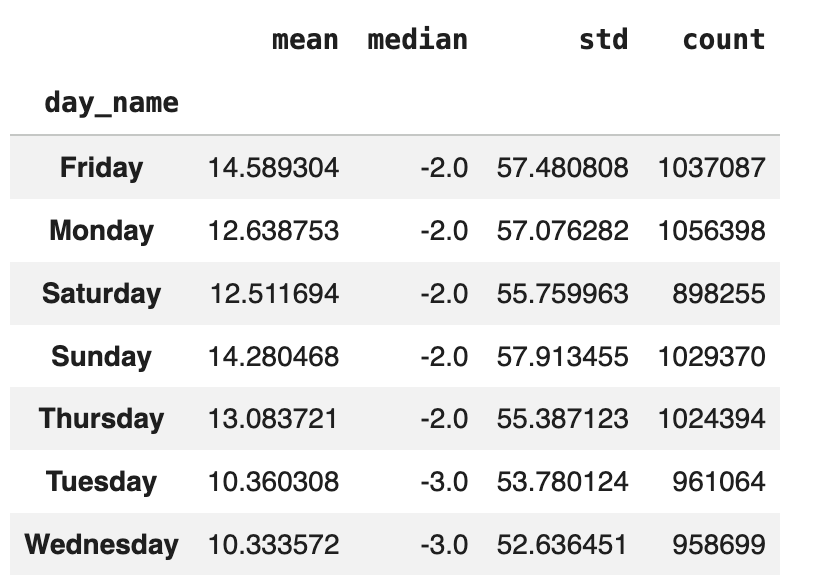

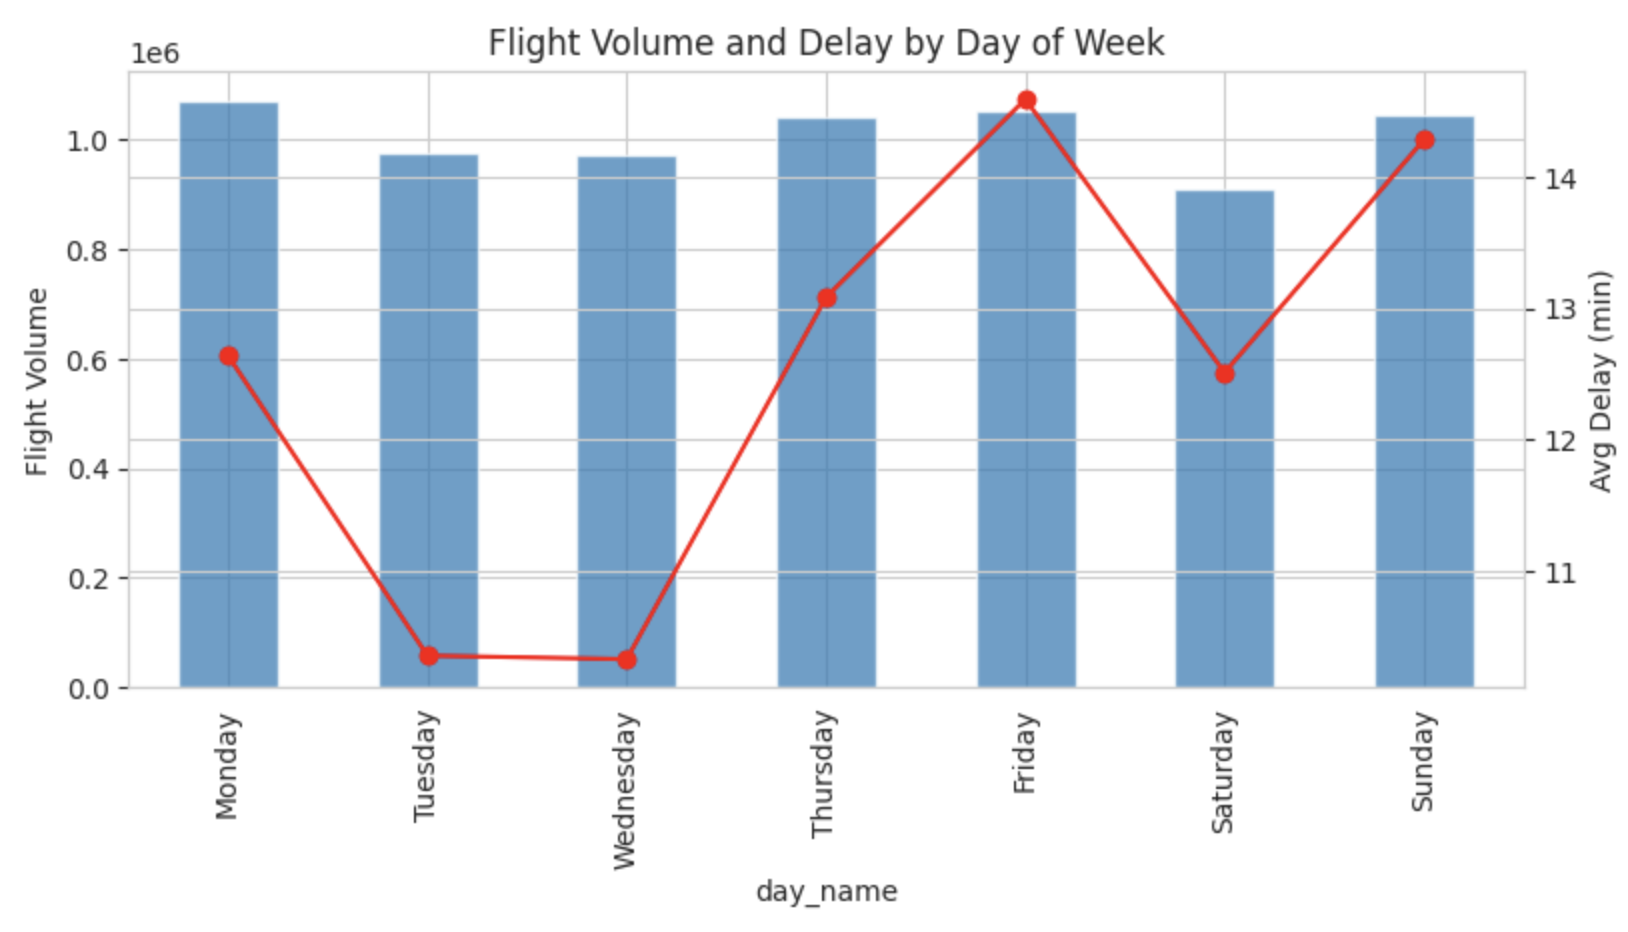

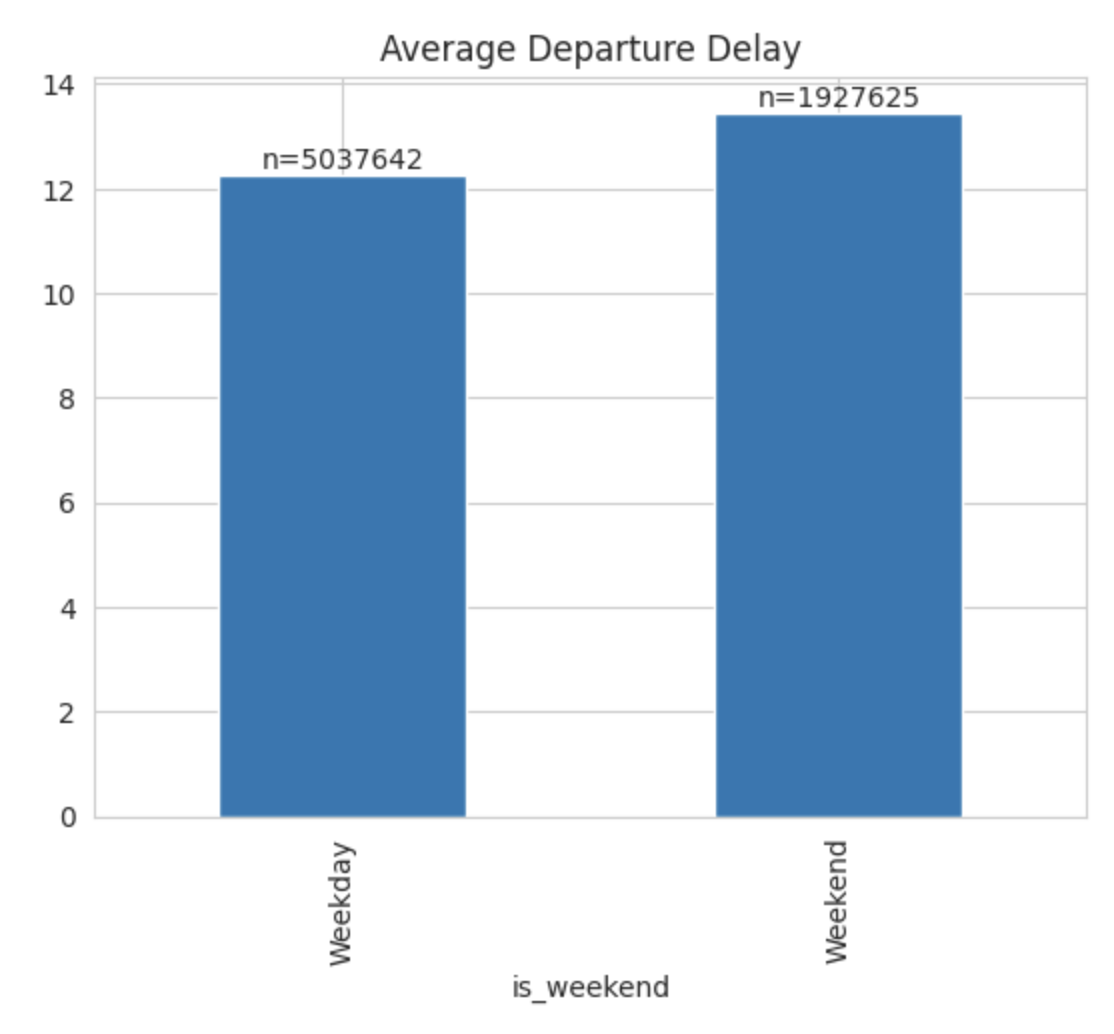

The hourly plots show delays increasing steadily from early morning through the evening. Early flights are usually on time because aircraft and crews start the day already in position. As the day progresses, each late arrival pushes the next departure back, so delays propagate through aircraft rotations. The seasonal plots indicate that summer has the highest cancellation rate. This aligns with the increased prevalence of convective weather (thunderstorms), heavy peak-season traffic, and airspace congestion, all of which are more frequent in summer than in other seasons. These conditions tend to trigger ground stops, reroutes, and cancellations.

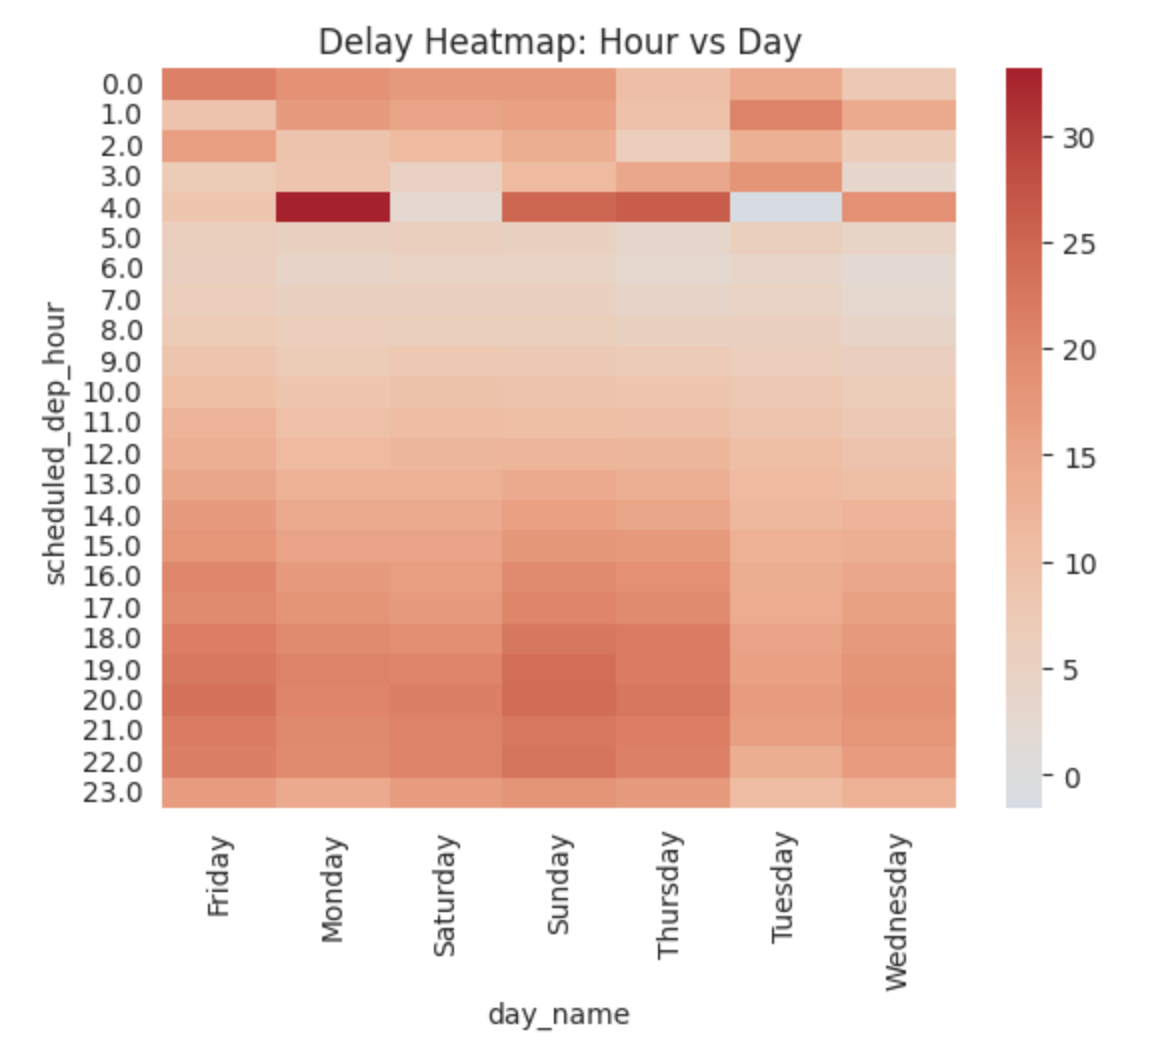

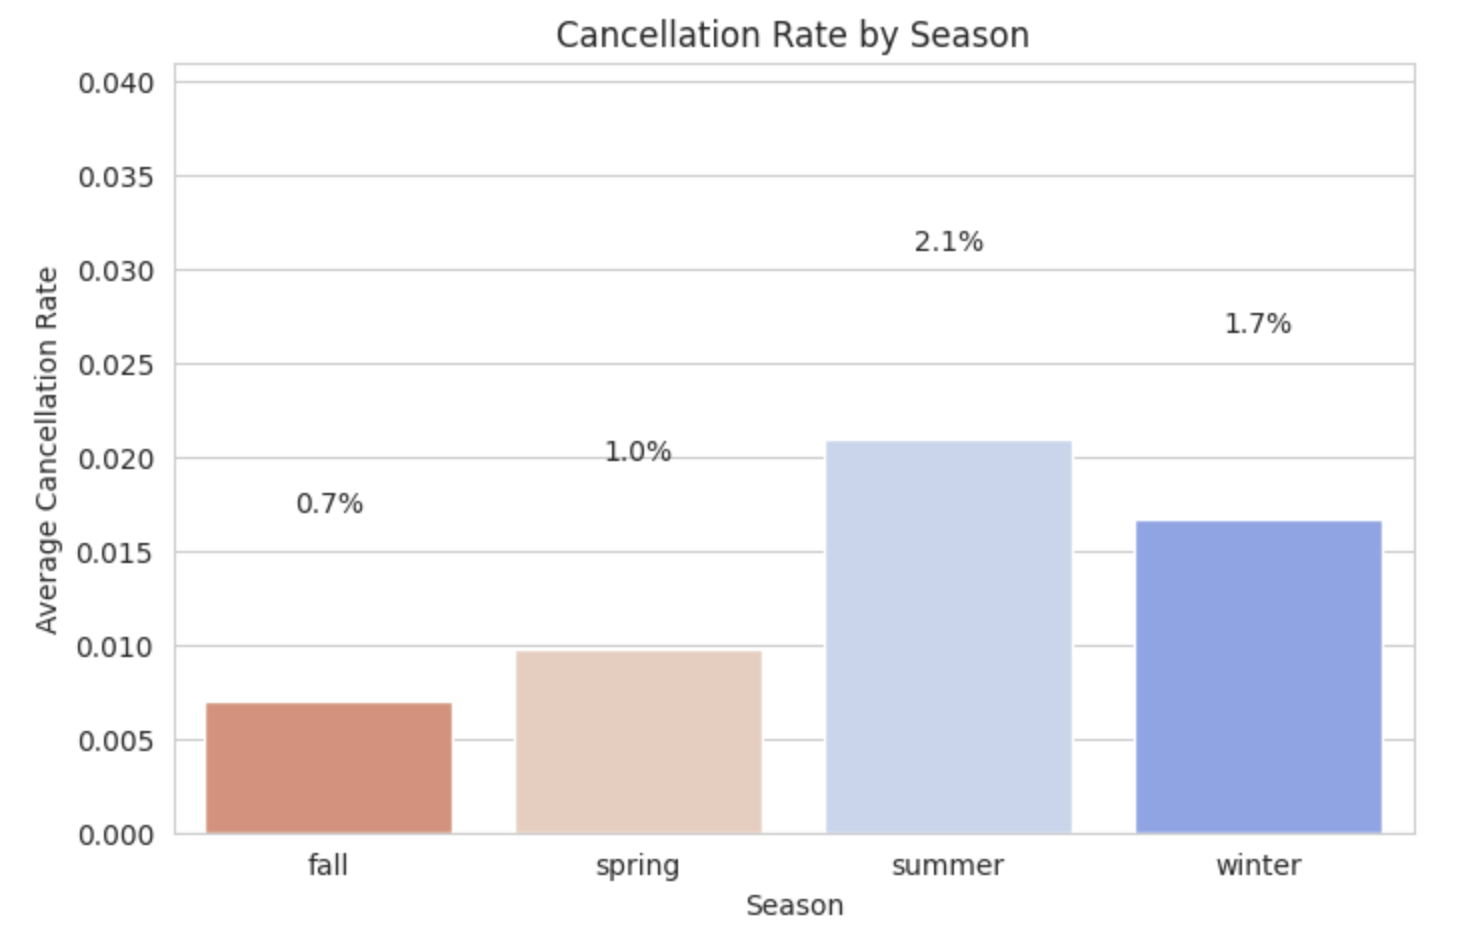

Overall, the temporal outputs indicate that delays are driven by a combination of day-of-week operational differences, within-day propagation, and seasonal weather and traffic pressures. This clarifies when delays are most likely to occur and lays the groundwork for understanding their magnitude and underlying mechanisms in the next step.

---

##Step 2: Delay Outcome Distribution
The delay histogram is heavily right-skewed: most flights have delays close to zero, but there is a long tail of large delays. This occurs because airline operations are designed to keep flights on time, so small delays are common and manageable. However, when disruptions occur (such as weather, congestion, or mechanical issues), they can cascade into very large delays.

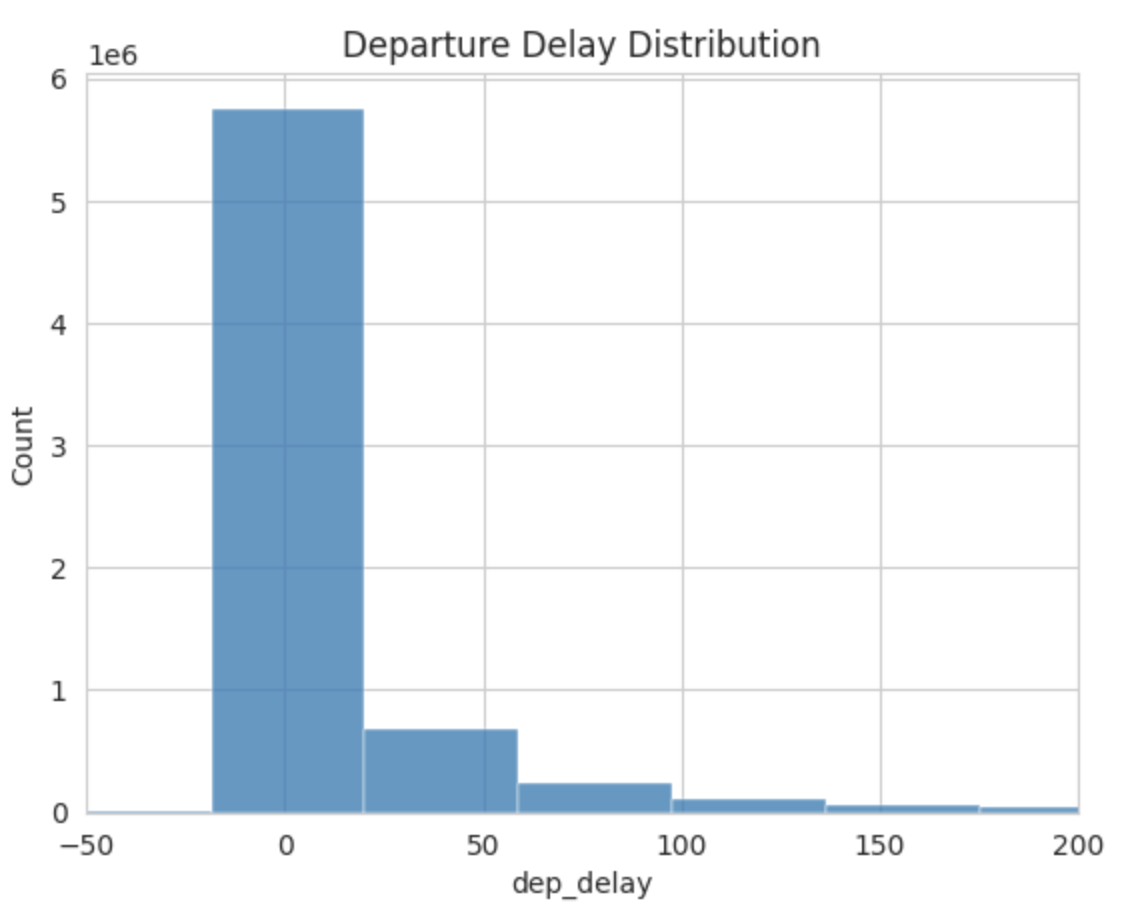

To understand how these delays evolve after departure, the departure–arrival delay scatter plot provides a direct comparison. The points lie along a line with a slope close to one, and many observations cluster tightly around small values near zero. This indicates that arrival delay closely tracks departure delay, and that large delays occur less frequently than small delays, consistent with our previous analysis.

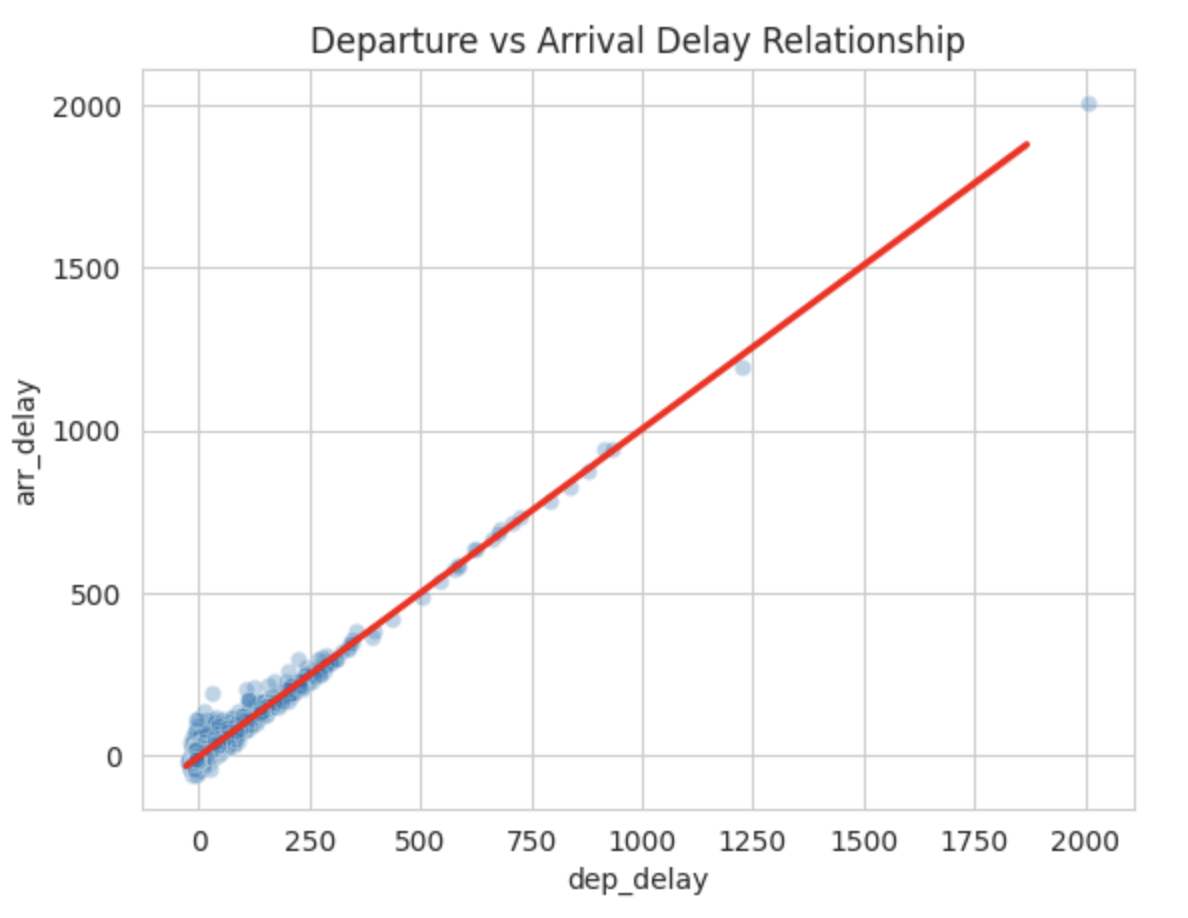

The delay bucket table shows that severe delays are relatively rare, but they matter because they account for a large share of total delay minutes. The fact that the mean is much larger than the median confirms that a few extreme cases pull the average up. Carrier boxplots show that some airlines have tighter distributions while others have wider spreads, likely reflecting differences in schedule buffers, turnaround efficiency, and network design.

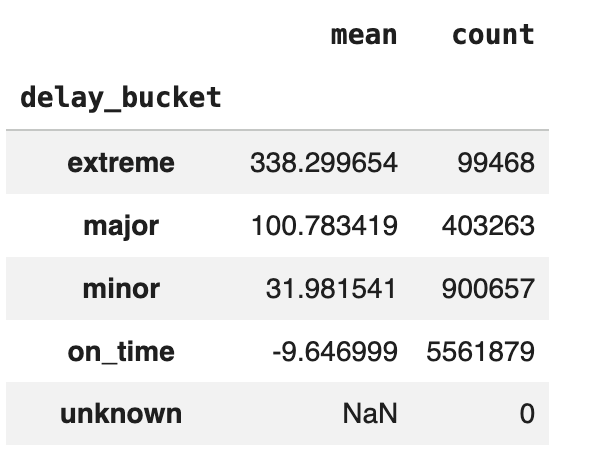

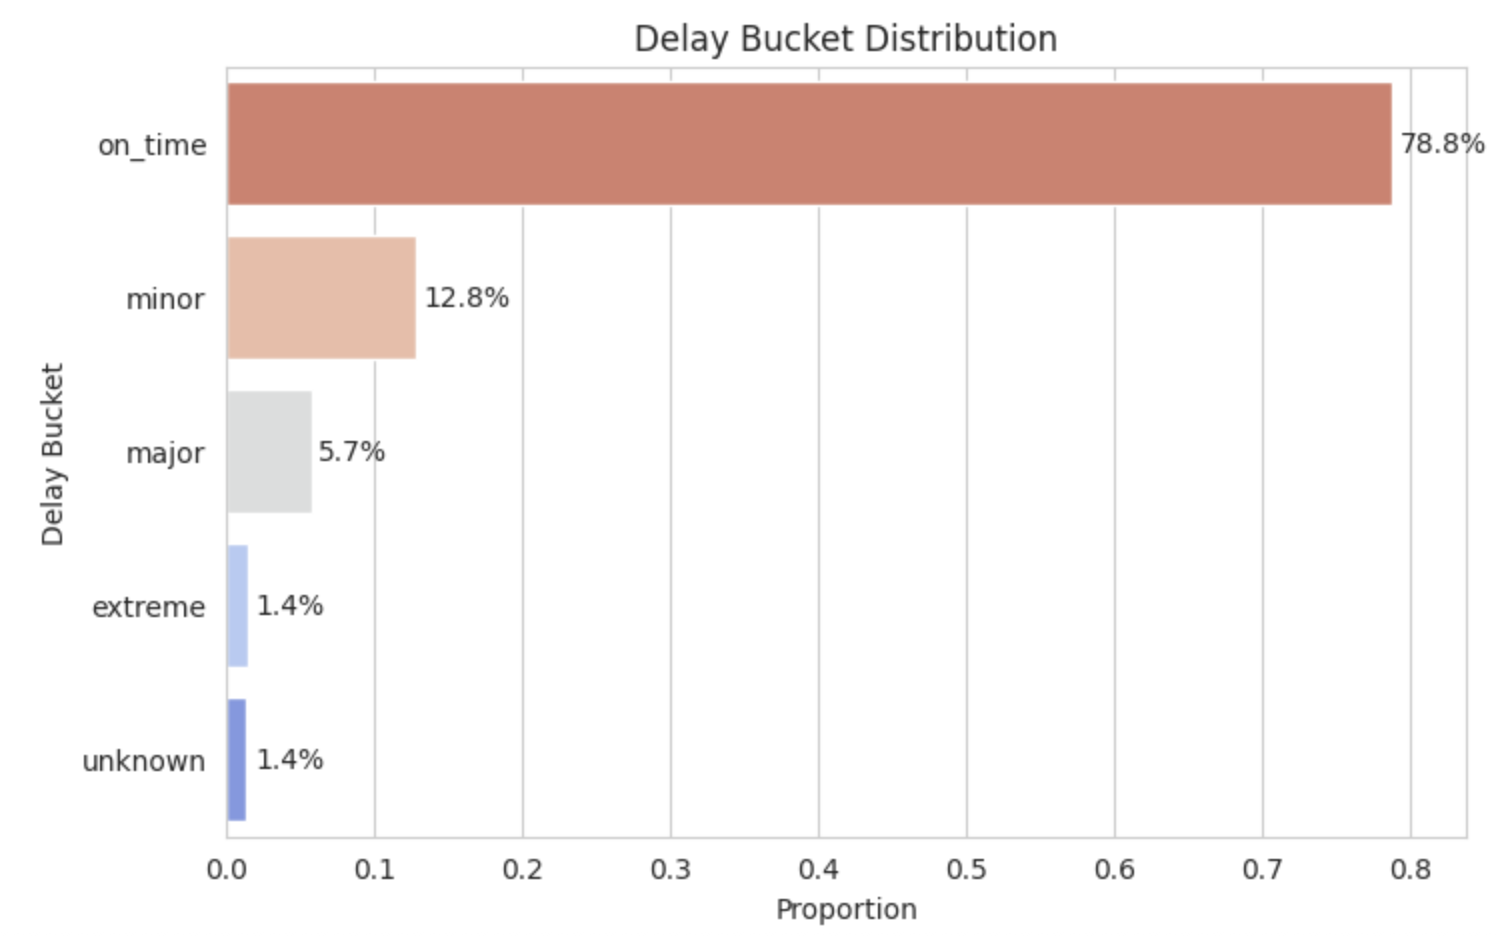

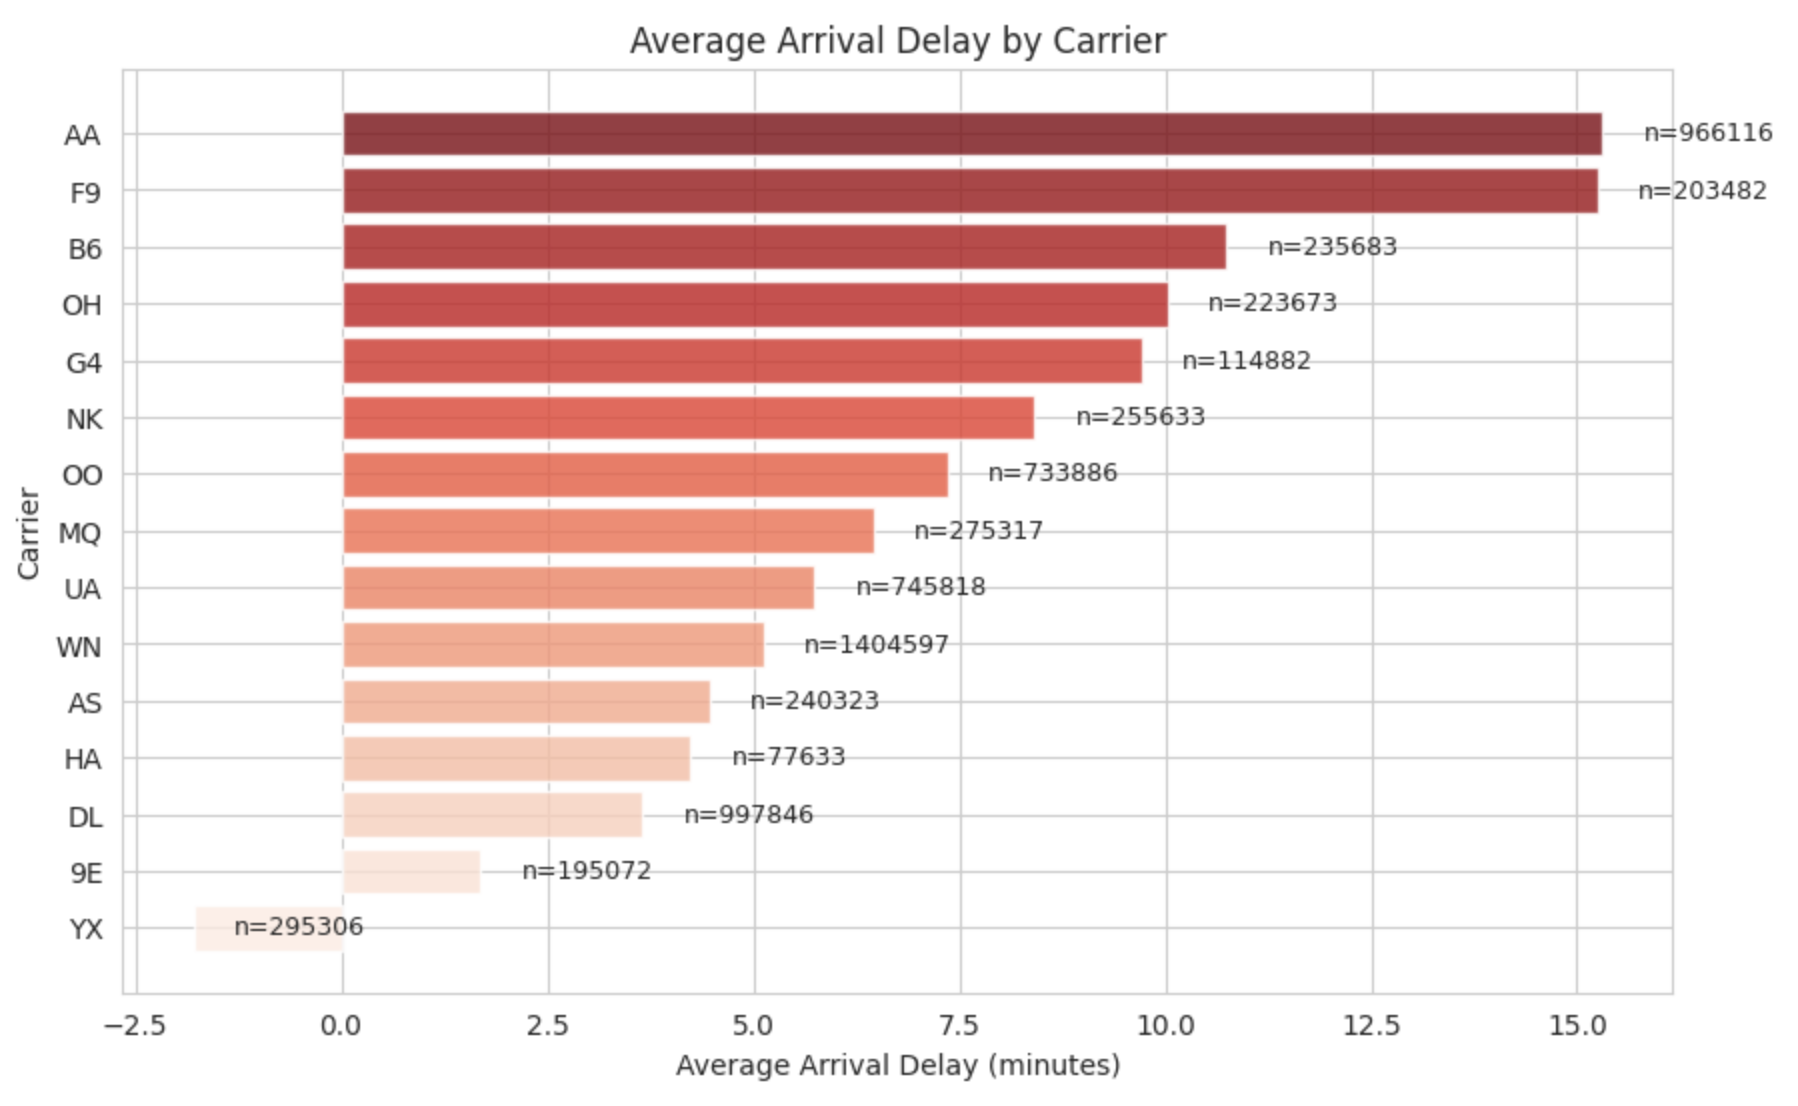

At this point, we know that delays accumulate over time and are highly uneven in size. The next step is to understand which operational processes actually create those delays.

---

##Step 3: Operational Mechanisms
The taxi time versus departure delay plot shows a very weak relationship. Most flights have short taxi times and small delays, and significant delays still occur even when taxi times are moderate. This suggests that runway taxi congestion is not the primary source of departure delays; they are more likely driven by upstream factors such as late-arriving aircraft or gate-related issues.

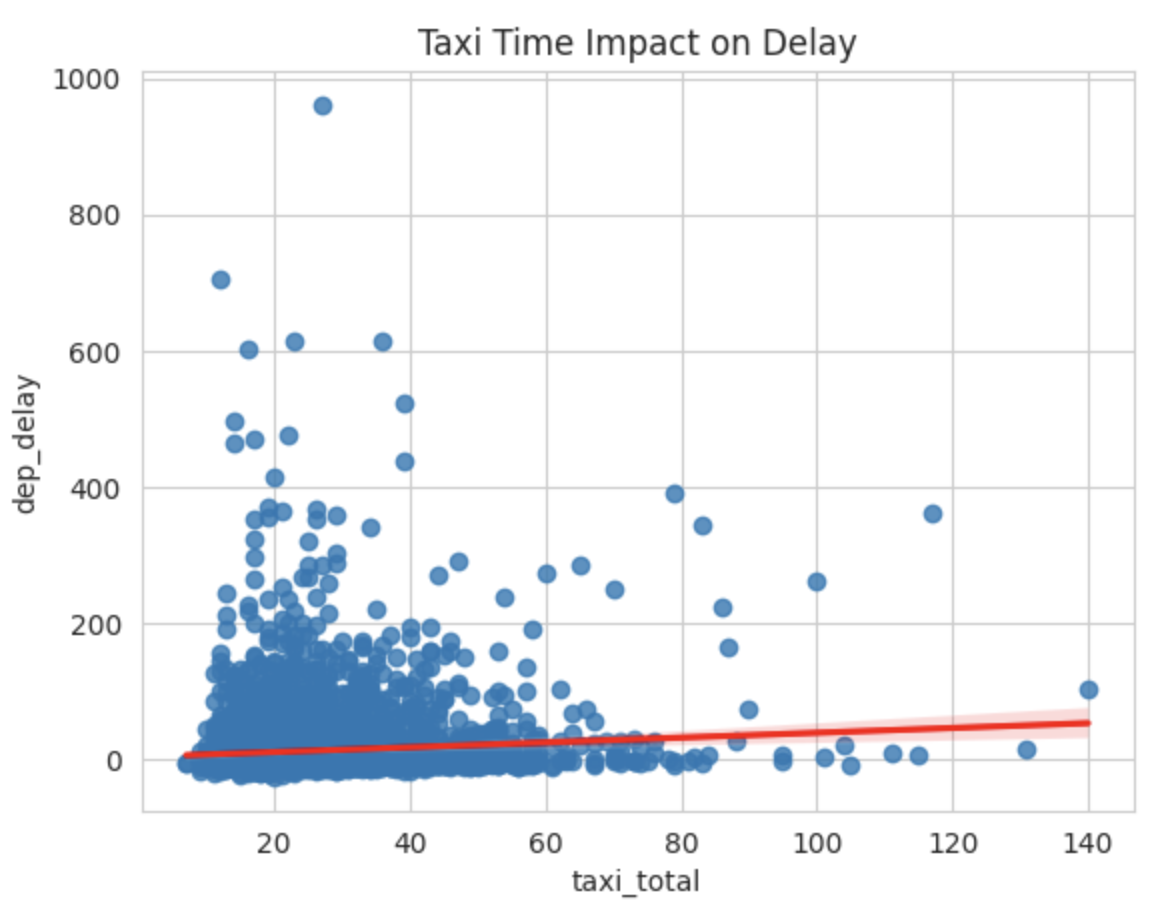

Schedule padding serves as the primary buffer. The distribution centers around 31 minutes, with a wide spread and some negative values. This suggests that airlines intentionally build slack into schedules to absorb earlier delays, though variation across routes and the presence of a few negative values point to uneven scheduling practices or possible data issues.

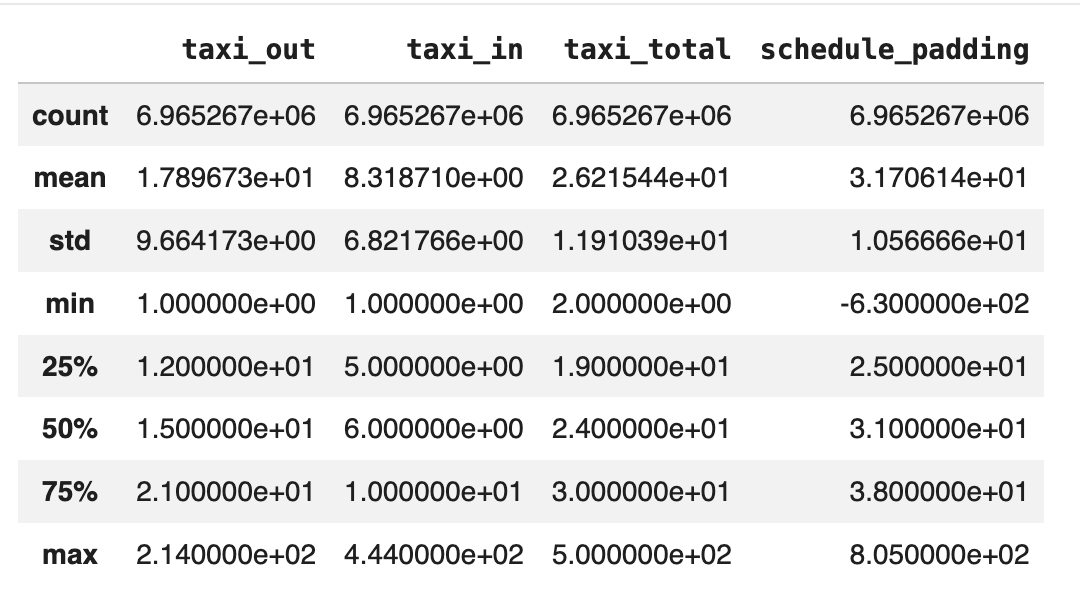

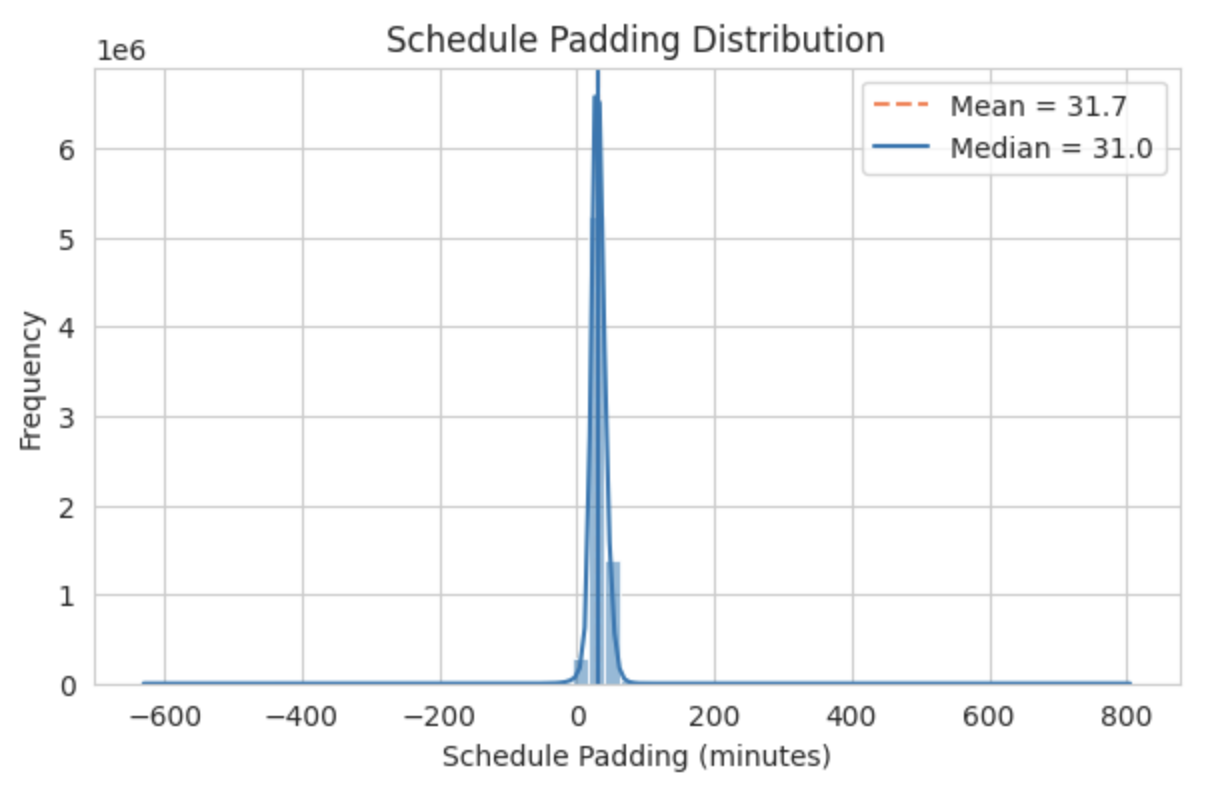

Air speed is tightly concentrated within realistic cruise ranges (about 400–600 mph), with a few extreme outliers. Its relationship with delays is negligible: the correlation is 0.0184 with departure delay and −0.0414 with arrival delay. This indicates that variations in cruise speed do not meaningfully explain delays; at most, slightly higher speeds may help make up small arrival delays.

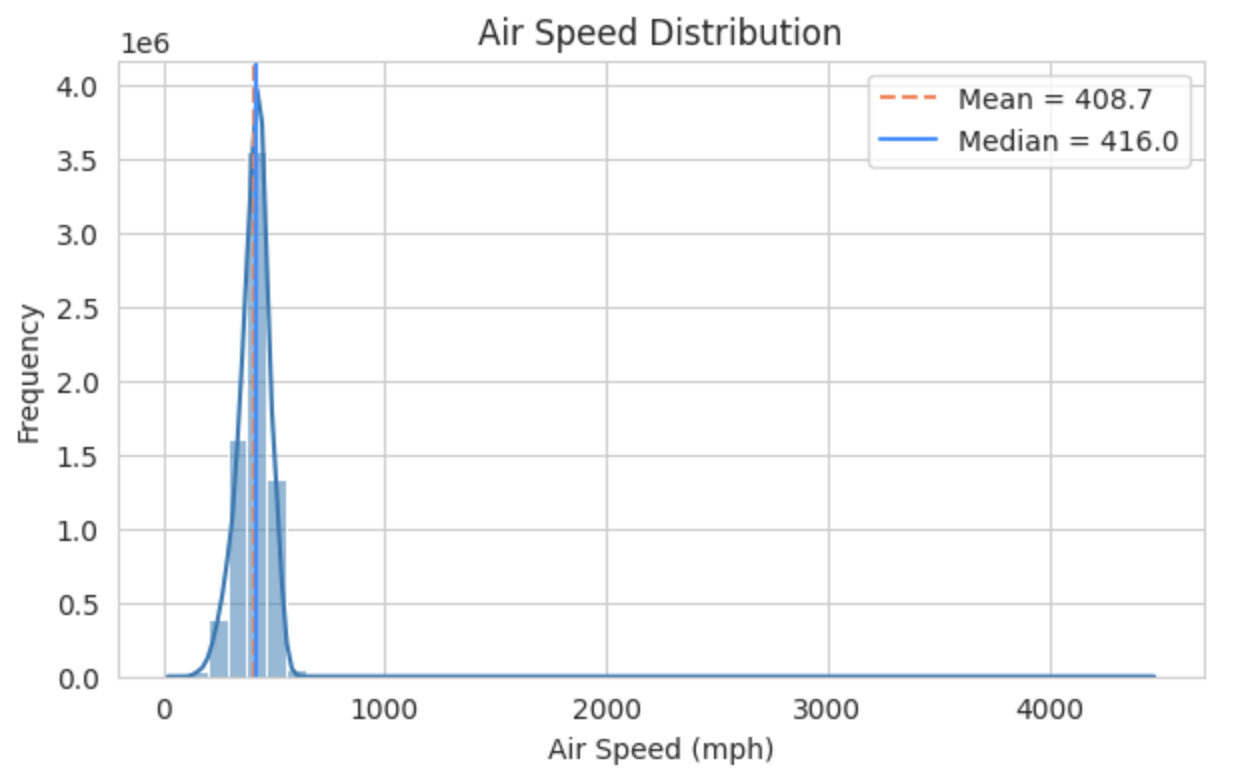

Correlation (air speed vs dep delay): 0.018391599045303762

Correlation (air speed vs arr delay): -0.041440942614413154

Taken together, these patterns show that delays are primarily generated on the ground and partially managed through scheduling buffers, while in-air operations play only a minor corrective role. This makes it necessary to examine airport-level patterns next.

---

##Step 4: Airport Context
Average delays by airport show that some airports consistently experience higher delays. These are typically major hubs with high traffic density and limited runway capacity, making them more susceptible to congestion and weather-related disruptions.

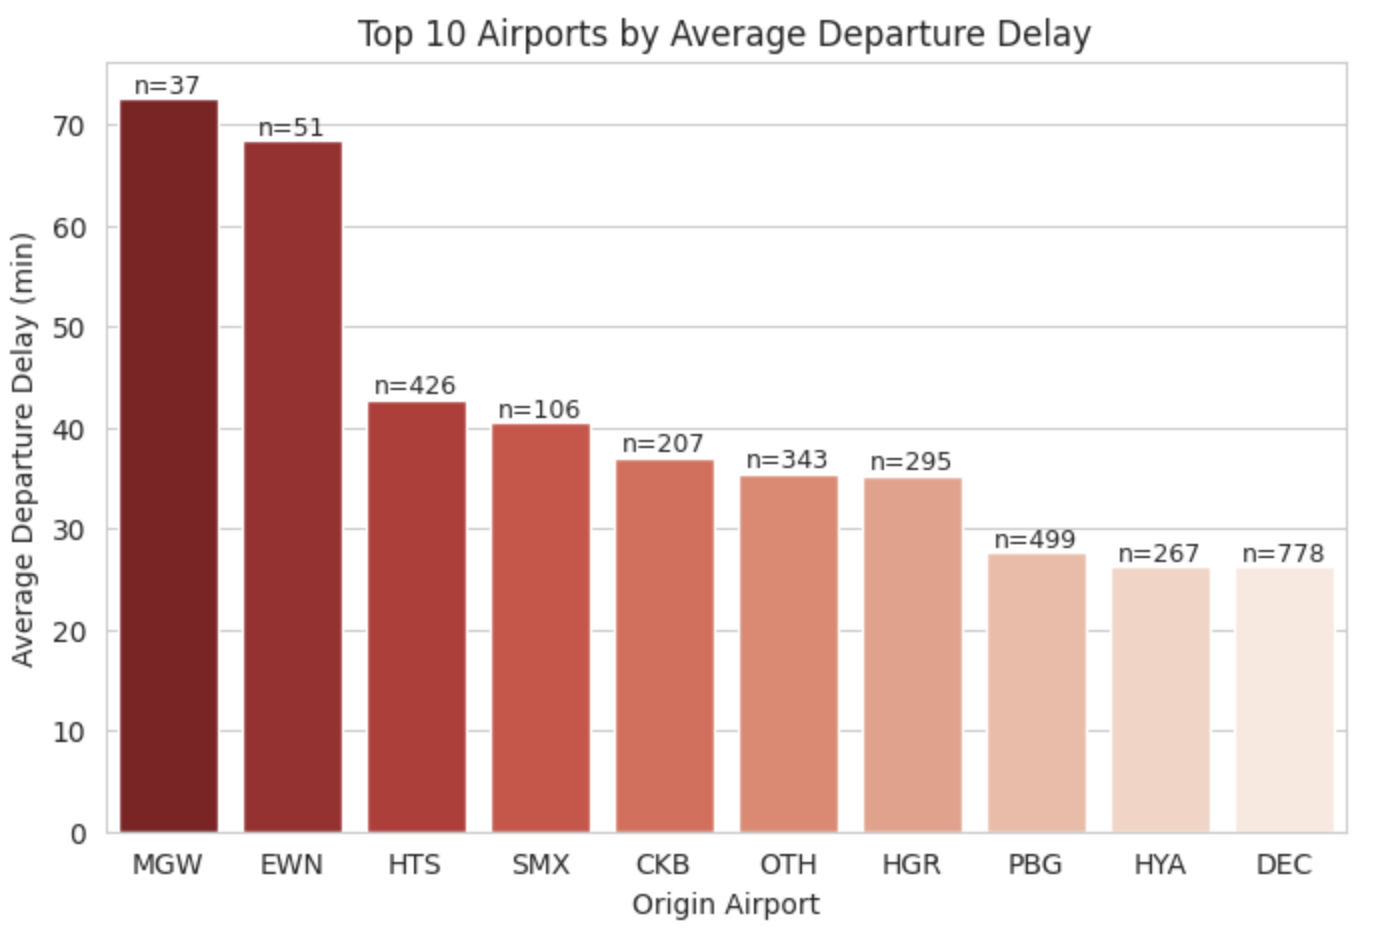

Consistent with this, the scatter plot shows a slight positive relationship between baseline average delay and actual departure delay. Although the overall trend is modest, airports with higher baseline delays exhibit greater variability and more extreme outliers. This indicates that congestion at busy hubs increases both typical delays and the risk of occasional spikes.

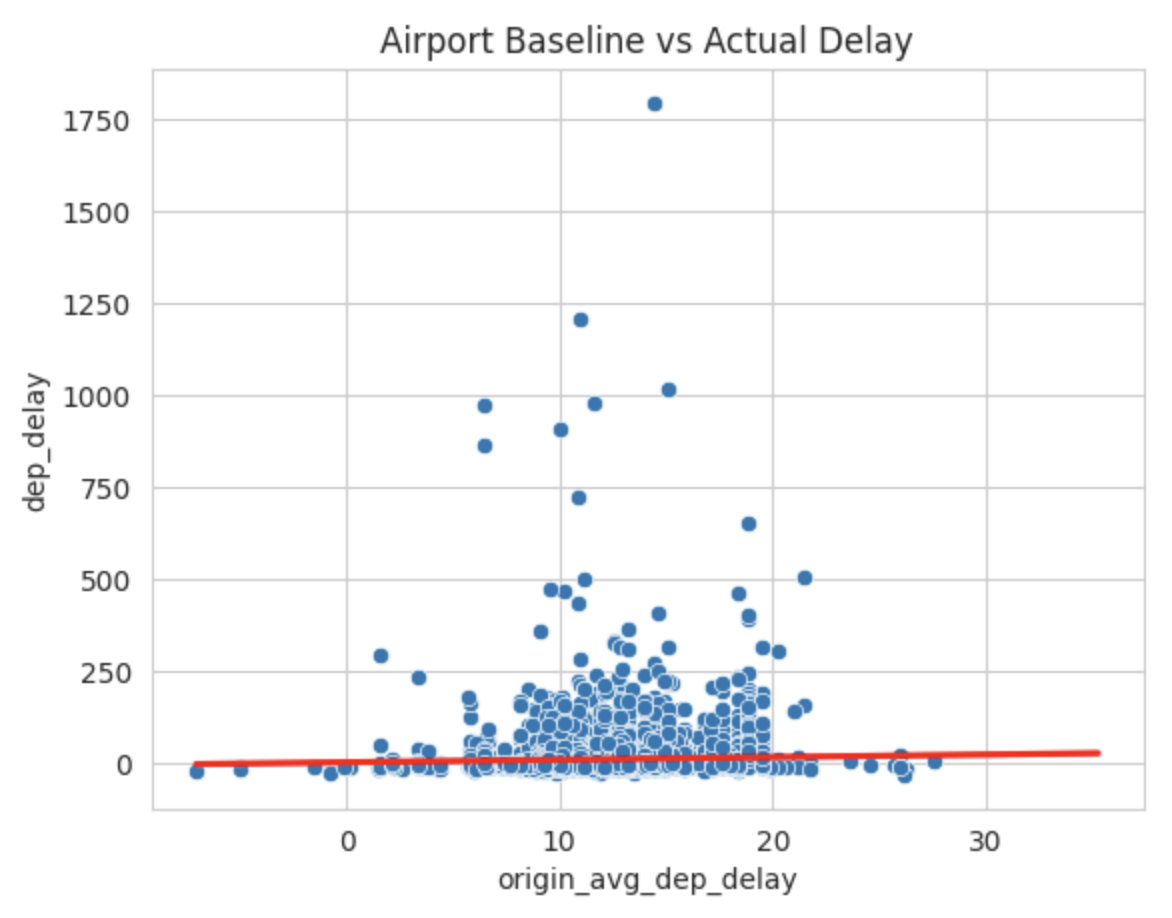

Comparing each flight to its airport’s average shows that while most flights cluster near the baseline, there is a substantial number of extreme cases. The high prevalence of outliers indicates that airport congestion alone does not fully explain delay variation; instead, certain routes or operational factors systematically lead to unusually high delays. Therefore, the next step focuses on route structure.

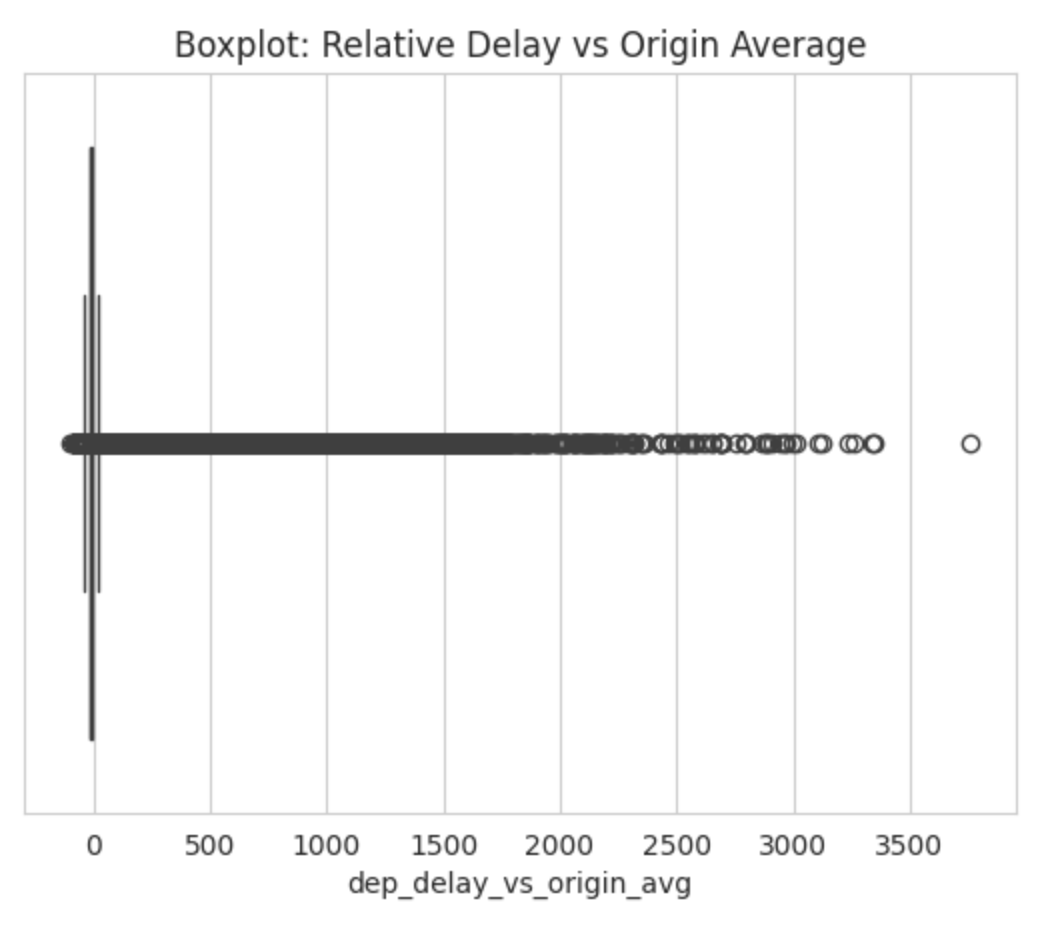

---

##Step 5: Route Structure
Distance-bucket results show that medium-haul flights have the highest average delays, followed by short-haul flights, while long-haul flights have the lowest. Medium-distance routes often connect major hubs and run through dense traffic corridors, creating congestion risks at both origin and destination. Although short-haul flights face tight turnarounds, long-haul flights usually include more schedule buffer, which helps absorb disruptions.

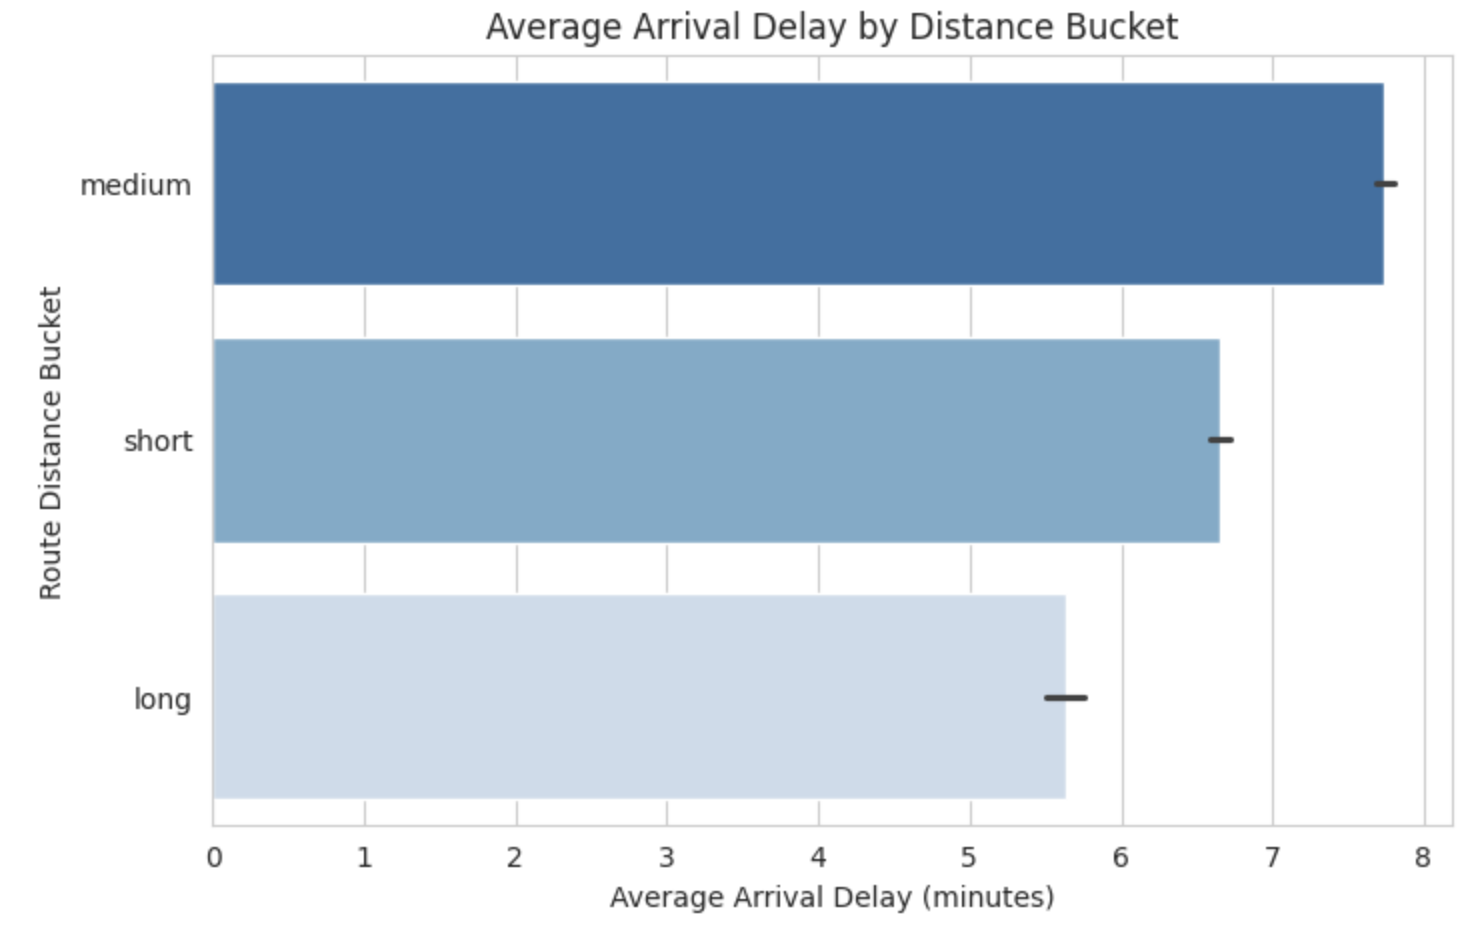

At the route level, some origin–destination pairs consistently experience higher delays, typically because they connect congested airports. However, the Route Volume vs. Delay analysis reveals an almost zero, slightly negative relationship, indicating that higher frequency does not necessarily increase delays. This finding is consistent with the flight volume distribution shown in the bar chart. High-volume routes may benefit from more optimized scheduling and resource coordination.

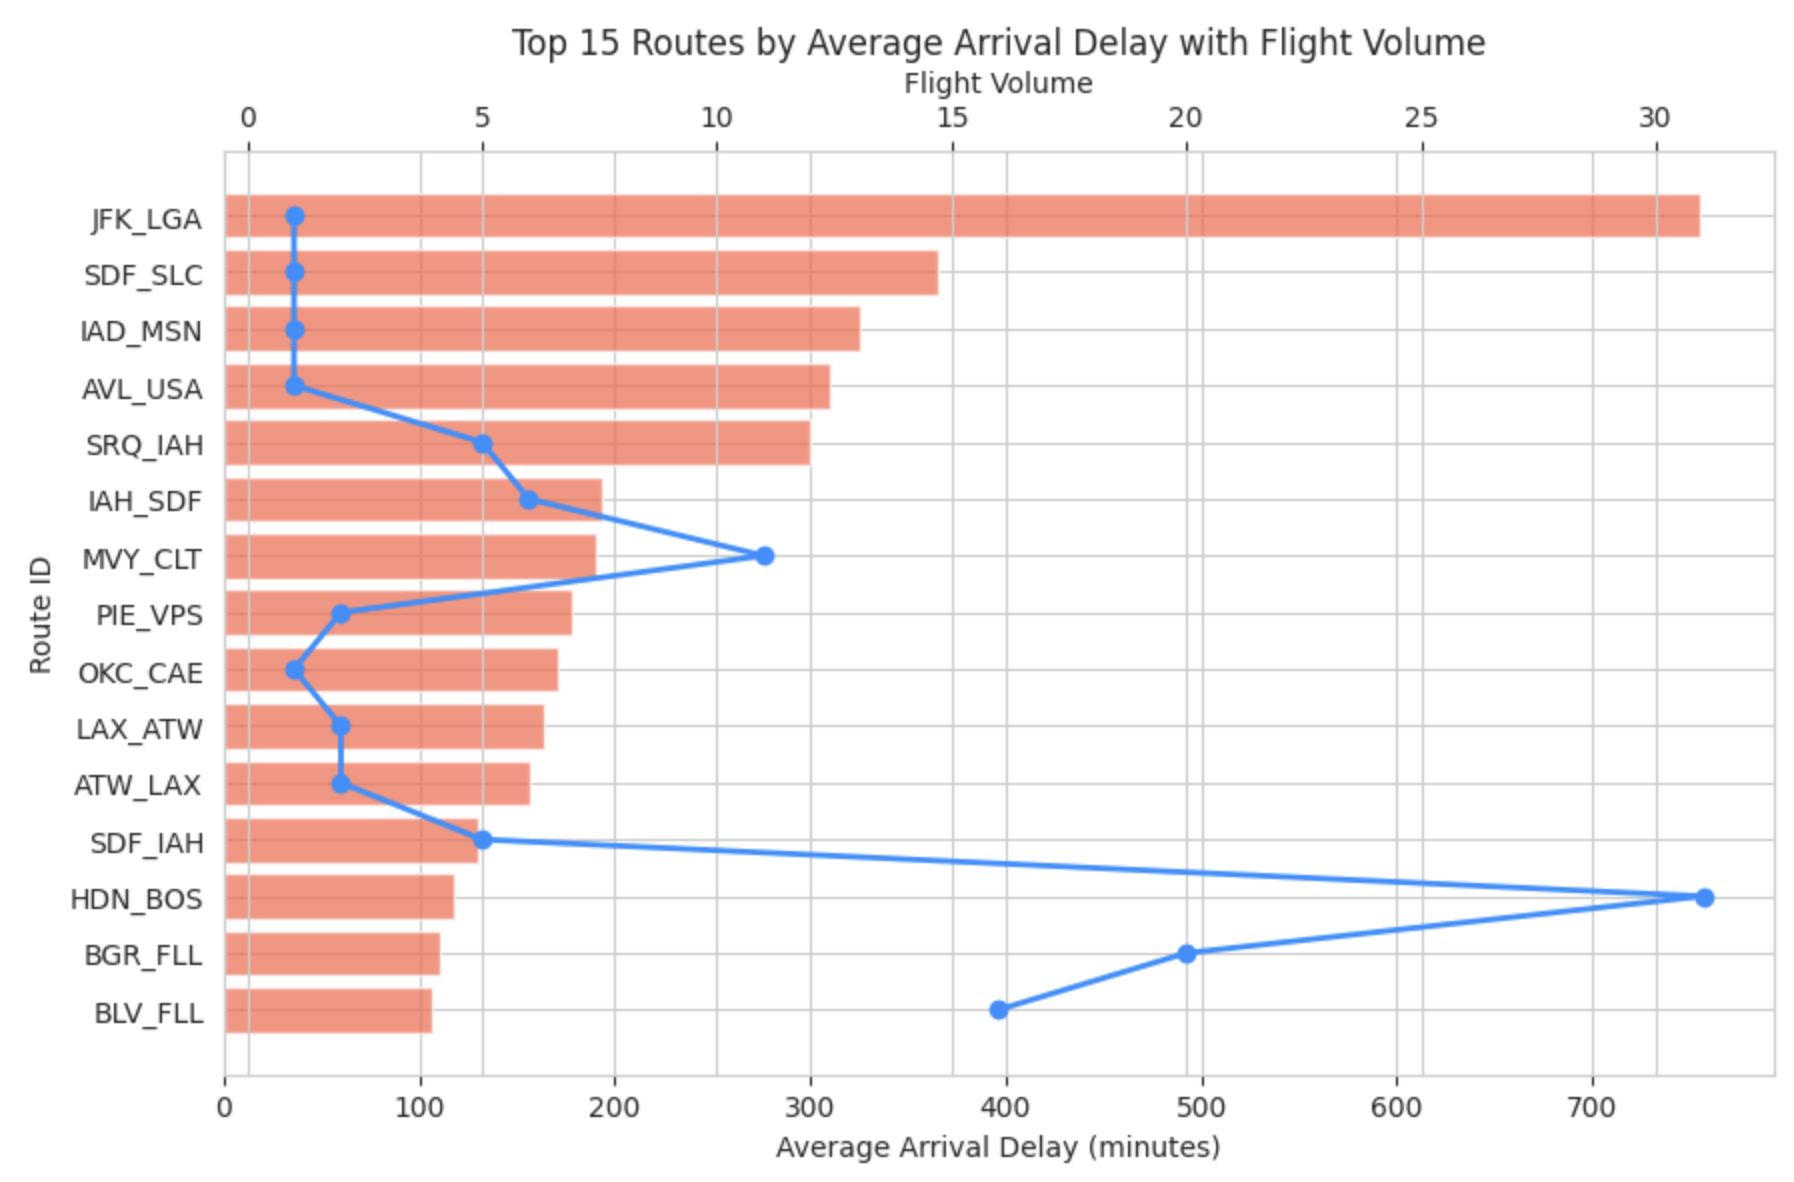

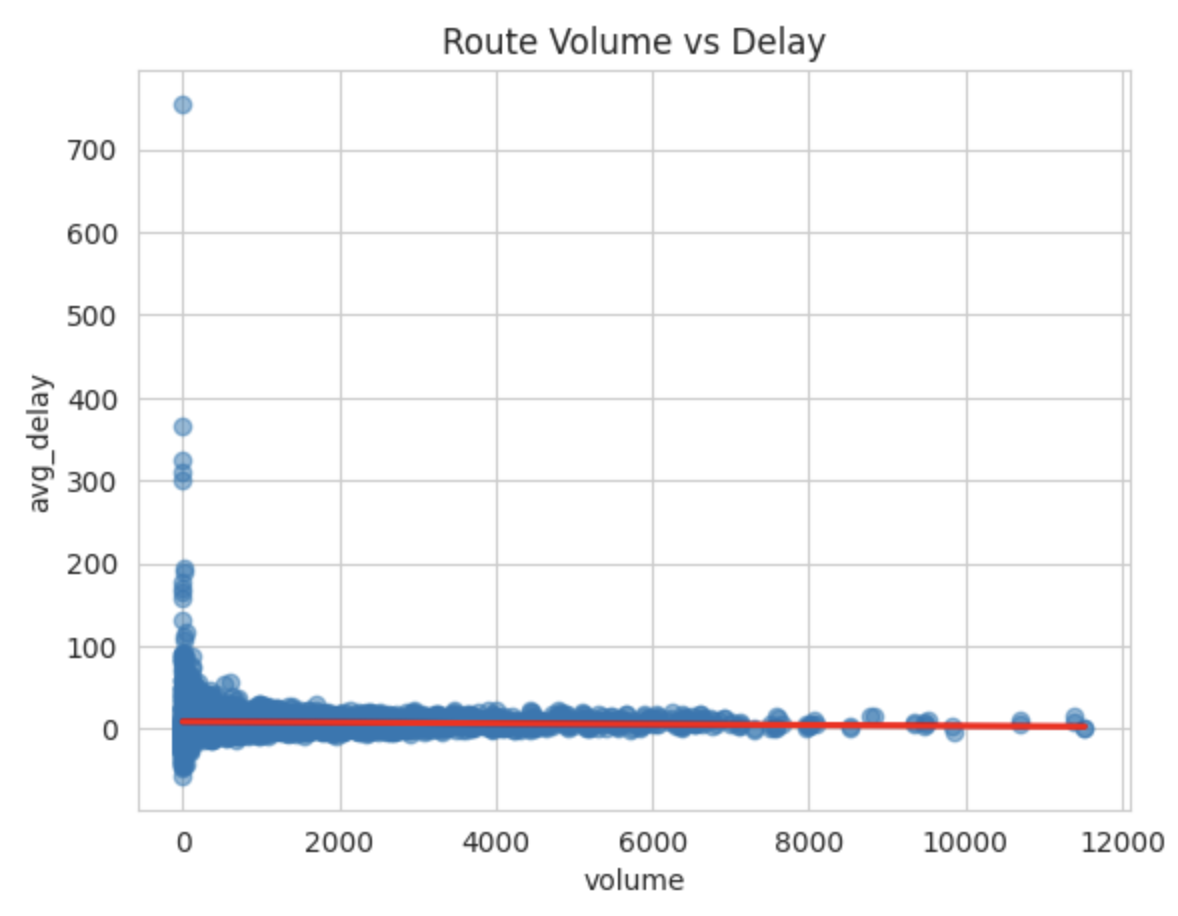

Because these routes are flown by multiple airlines with differing operational performance, the next step is to examine carrier-level behavior.

---

##Step 6: Carrier Behavior
Carrier comparisons reveal clear differences in both average delay and variability. Some airlines consistently operate closer to schedule, while others show a wider spread and more frequent extreme delays. These differences can be explained by variations in operational strategy, including the amount of buffer time built into schedules, turnaround efficiency, and how disruptions are managed.

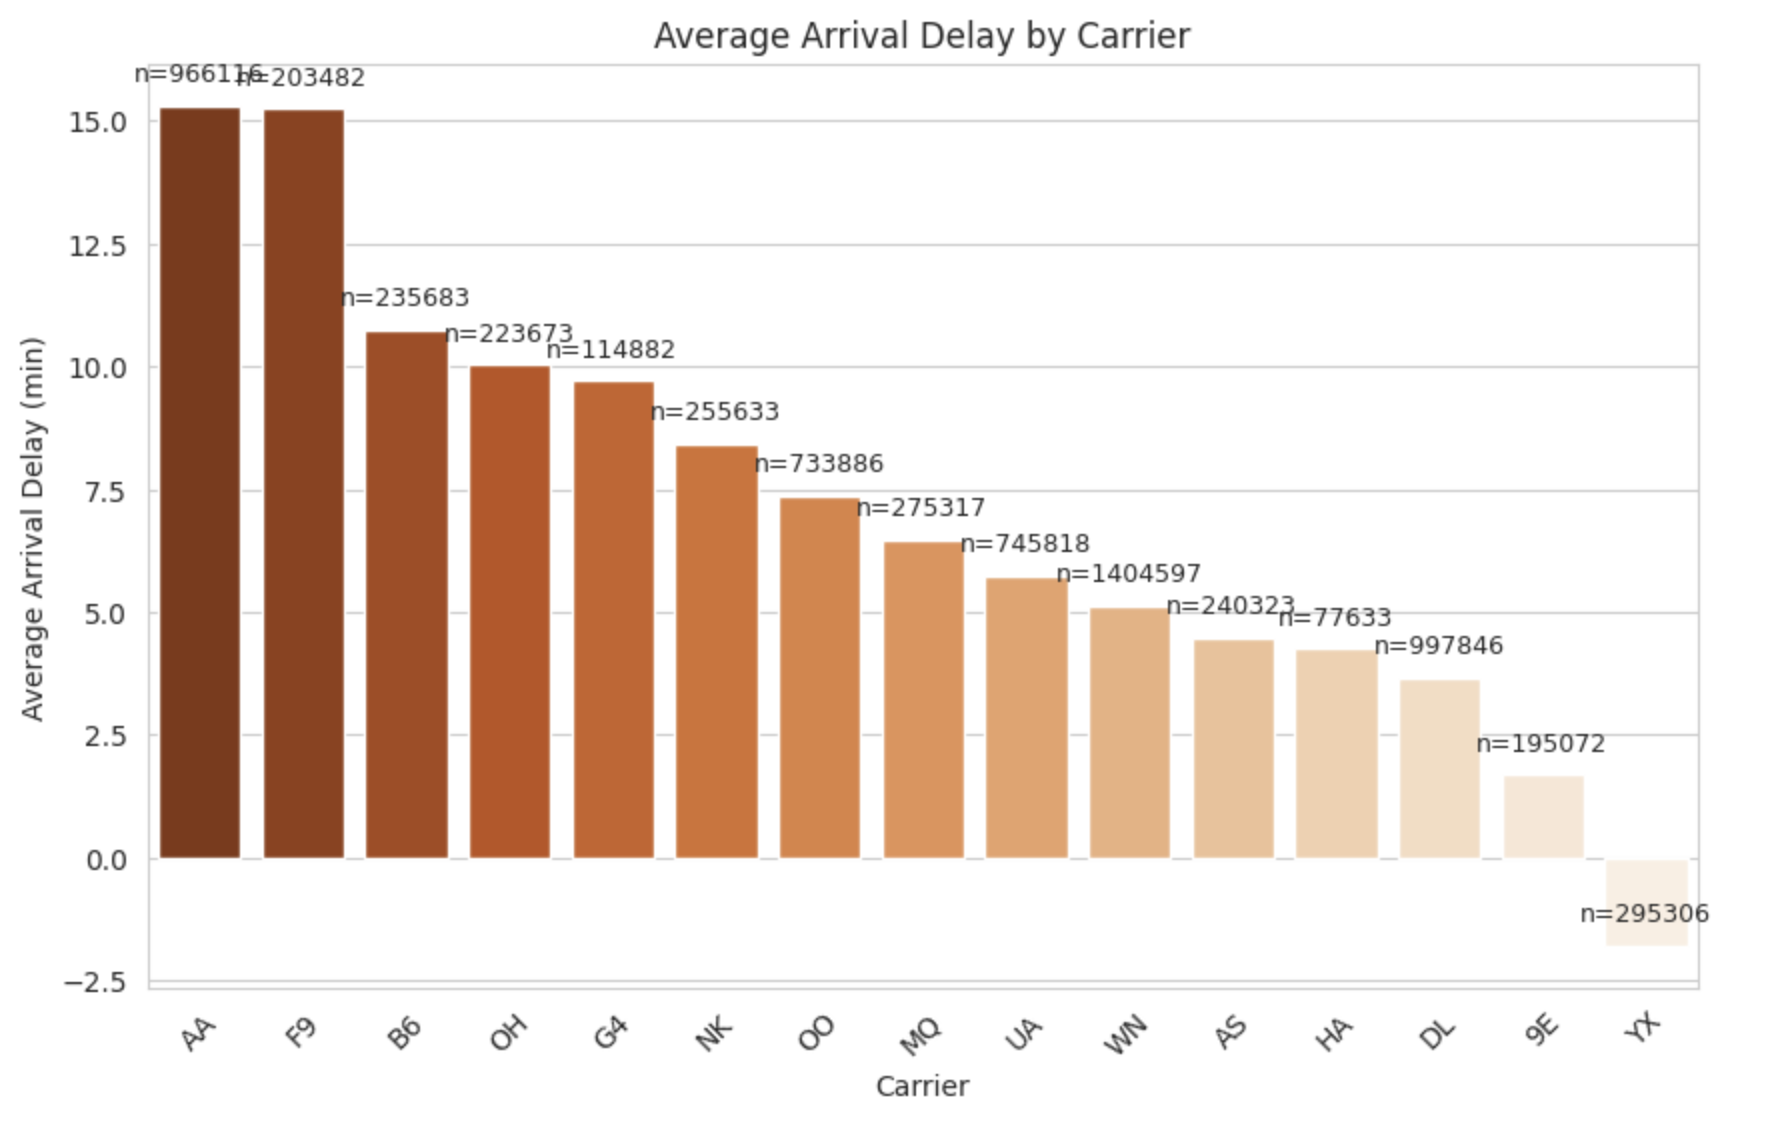

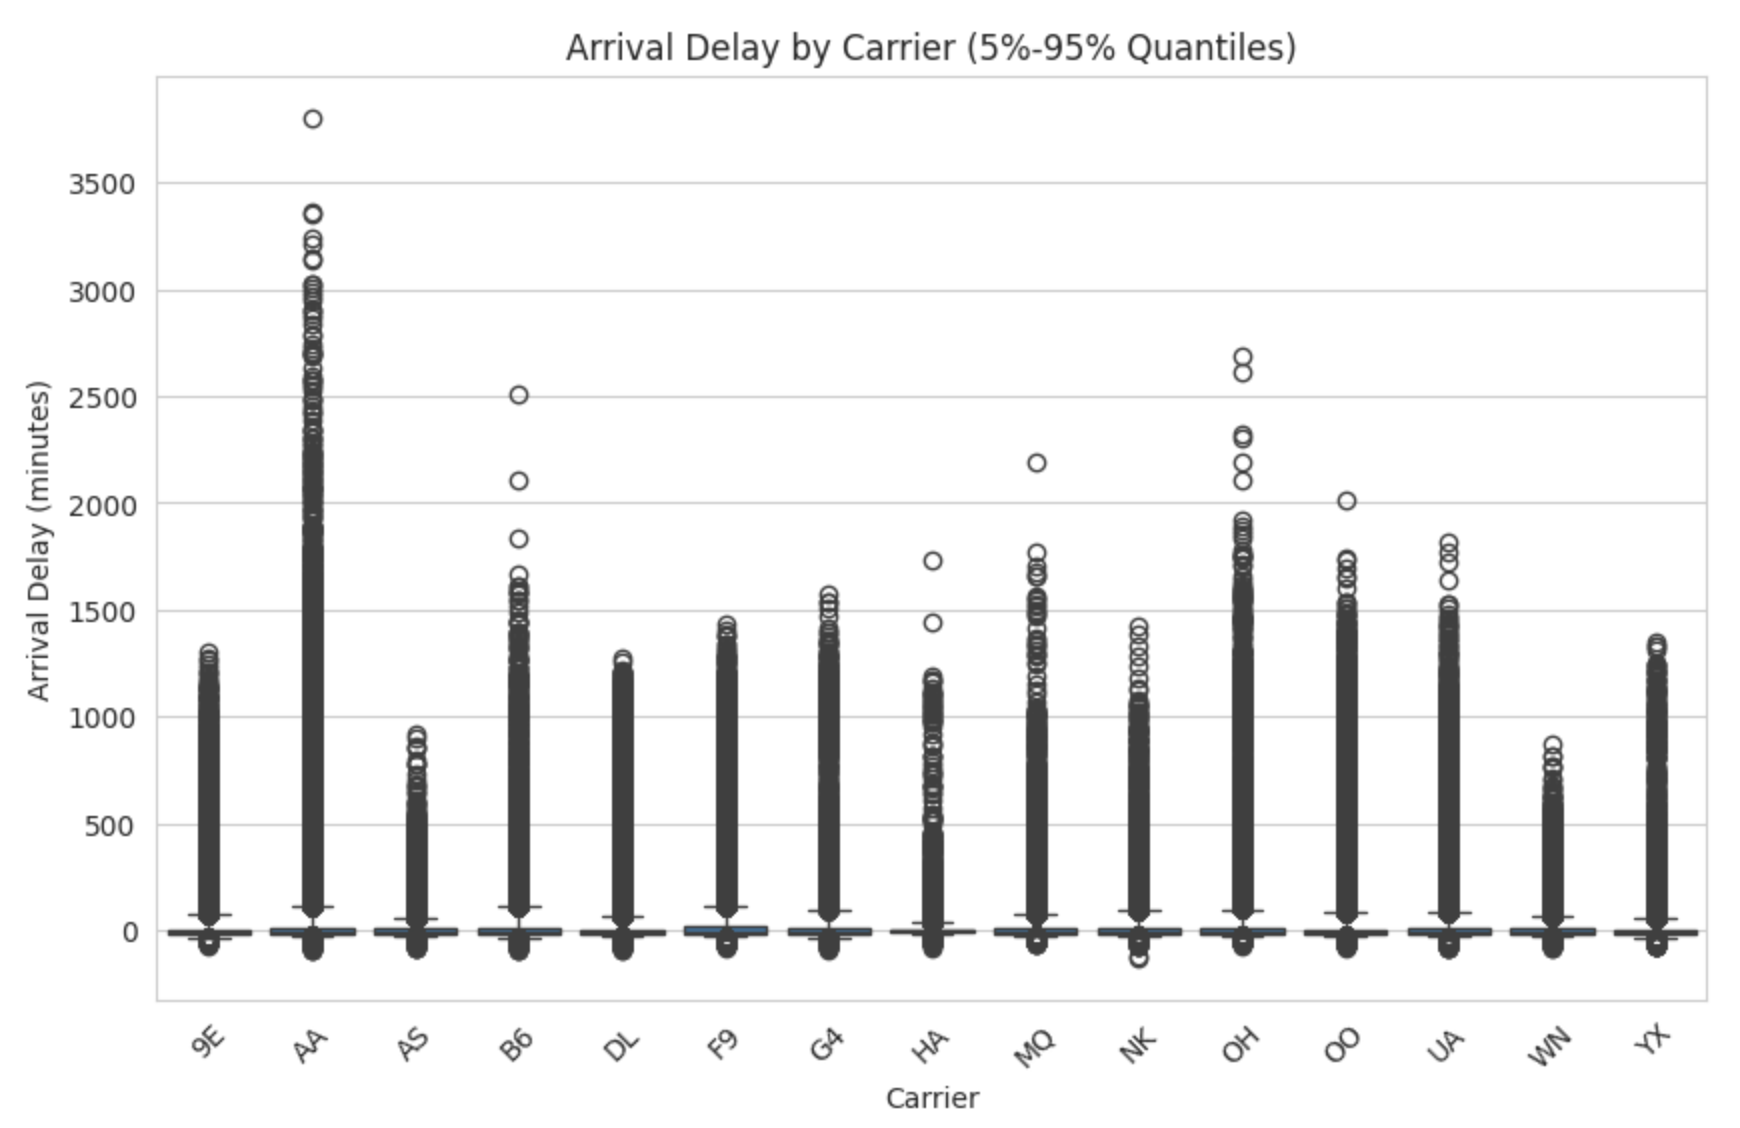

The interaction between carrier and airport shows that some airlines perform better at certain airports than others. This likely reflects factors such as local operational familiarity, gate access, fleet composition, and scheduling coordination at those locations.

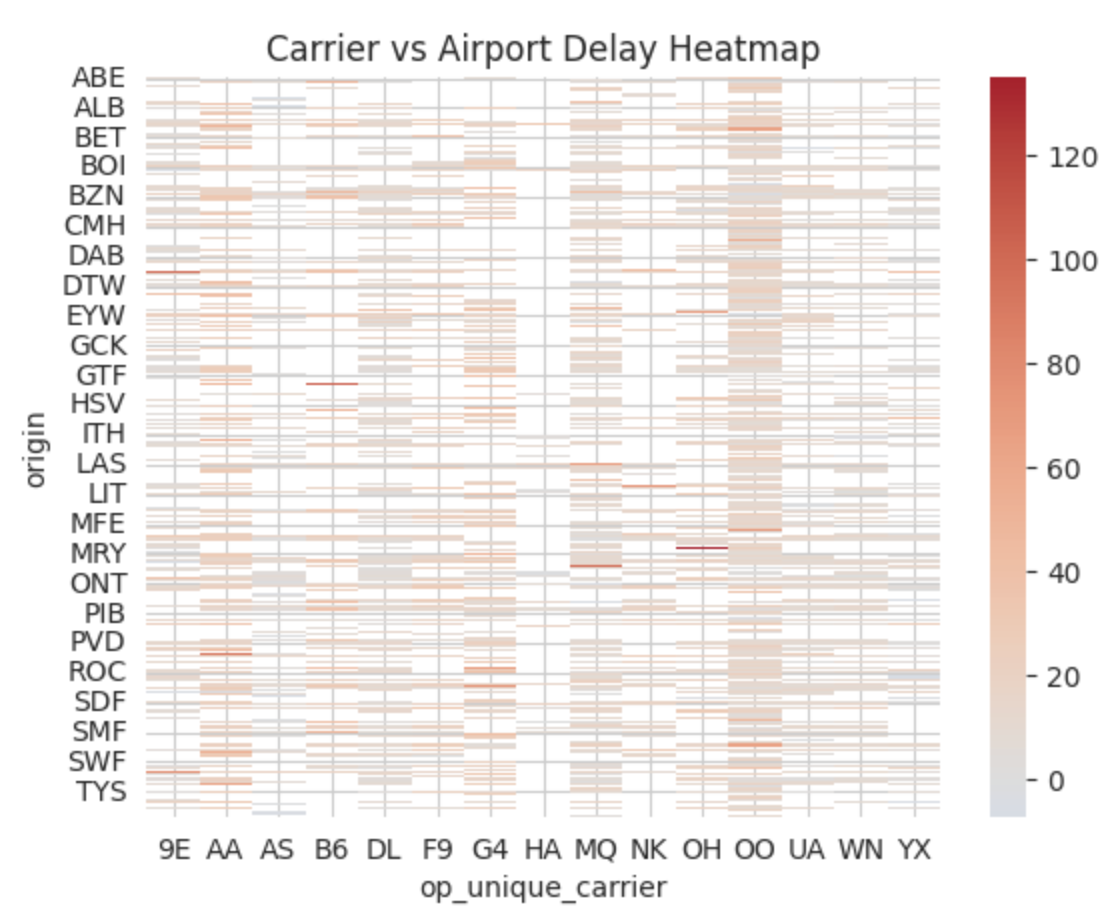

At this stage, the analysis has identified patterns across time, operations, airports, routes, and carriers. The next step is to connect these patterns to the official delay causes recorded in the data.

---

##Step 7: Delay Attribution
The breakdown of delay causes shows that delays stem from multiple sources: carrier operations, weather, and air traffic system constraints. Late-arriving aircraft account for the largest share, which is consistent with the operational and scheduling mechanisms identified earlier, where delays propagate through aircraft rotations. Weather-related delays peak in the summer months, aligning with the seasonal cancellation patterns observed in Step 1. This confirms that the statistical patterns identified earlier reflect real operational drivers rather than random variation.

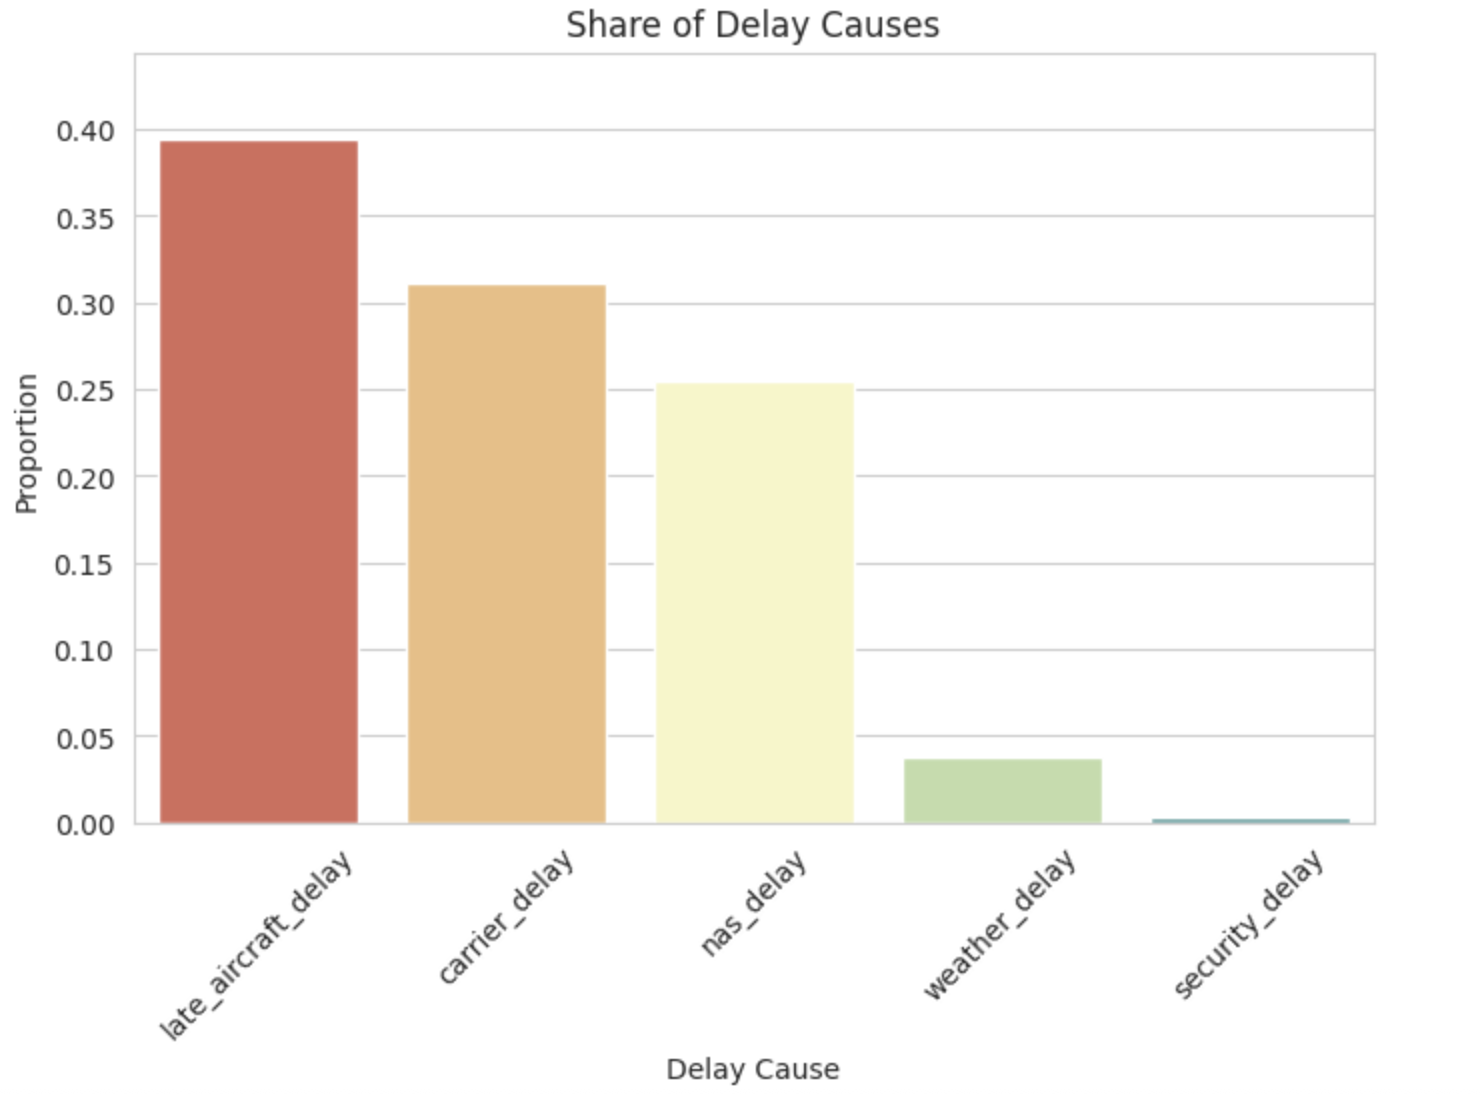

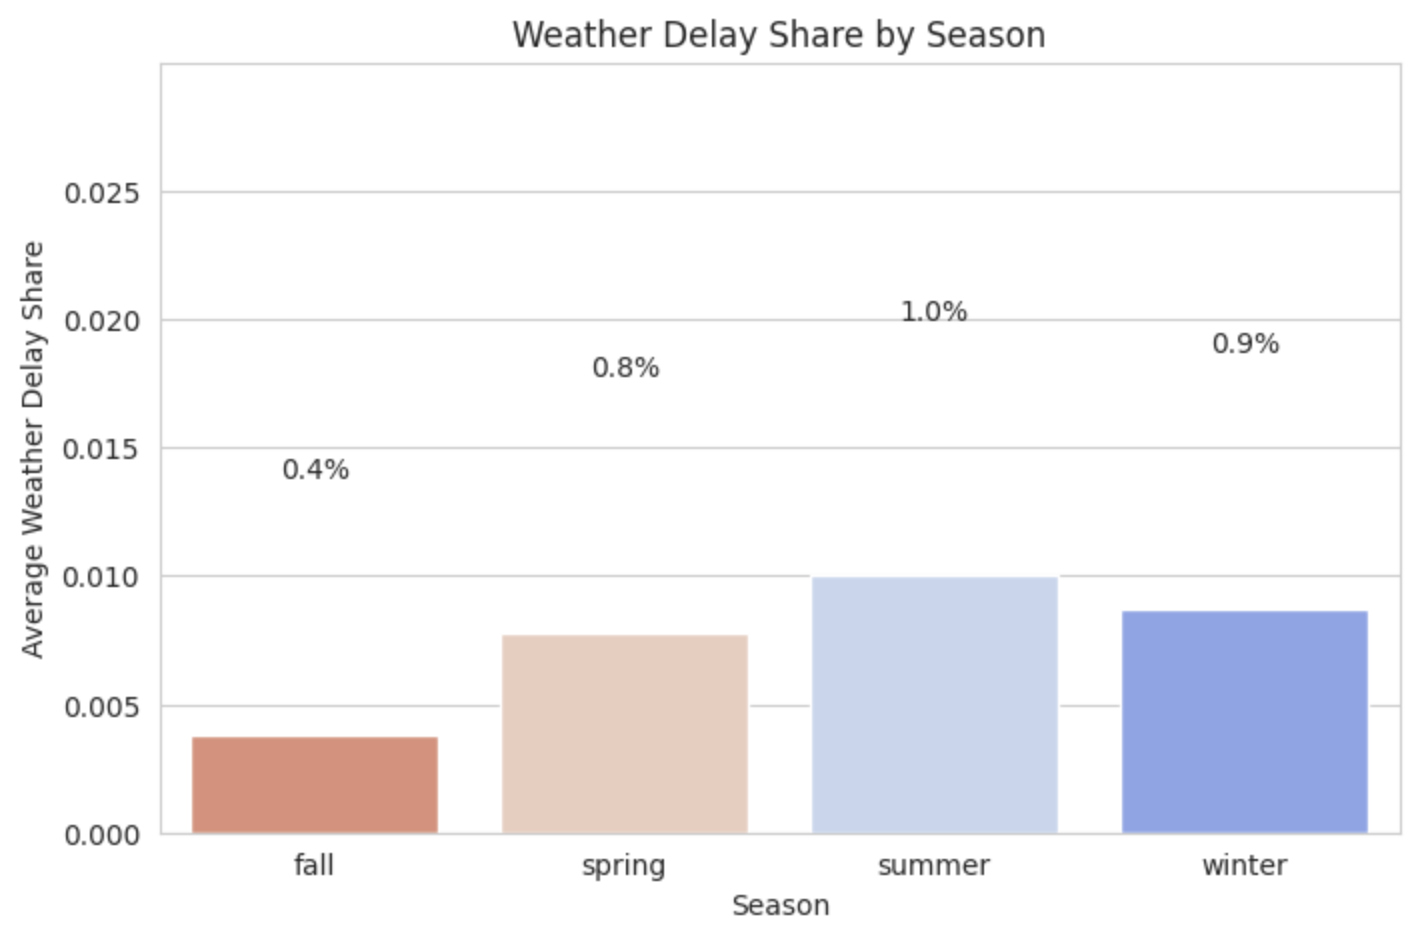

However, the heavy-tailed distribution suggests that extreme events still play a distinct role, which leads to the final step.

---

##Step 8: Outliers
The extreme-value summary shows that only a very small share of flights exhibit abnormal operational values, with outlier rates of about 0.9%–1.0% for taxi-out time, taxi-in time, total taxi time, and excess elapsed time. Although rare, these observations fall far outside the typical range and can still influence aggregate statistics such as the mean.

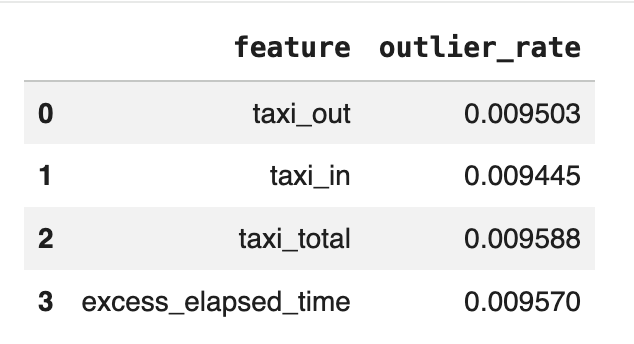

These extremes most likely reflect major disruptions, such as severe weather, mechanical issues, or network spillovers that significantly increase ground or total travel time. A small fraction may also reflect data noise. Since they are infrequent but high-impact, they should be handled carefully in modeling to avoid distorting results.

# Summary of key findings

Delays show a clear temporal pattern: they steadily increase throughout the day because of propagation across aircraft rotations, are more frequent on weekends, and reach their peak in summer when weather and congestion issues become more intense. The distribution of delays is heavily right-skewed; most flights face little to no delay, but a small number of extreme cases significantly raise the average. Departure delay closely predicts arrival delay, indicating limited in-air recovery once a flight departs late.

Operational analysis reveals that delays mostly originate on the ground rather than in the air. Taxi time has only a weak connection to departure delay, while schedule padding acts as a buffer that helps absorb moderate disruptions. Cruise speed has a negligible impact on delays. Structurally, major hub airports and medium-haul routes tend to have higher average delays, reflecting congestion effects. Differences at the carrier level are significant, suggesting that operational strategies and schedule designs greatly influence performance. Official delay attribution confirms that late-arriving aircraft is the main cause, supporting the idea that delays spread through network rotations. Although extreme events are rare, they significantly affect overall statistics and should be carefully considered in modeling.

# Challenges Faced and Future Recommendations

### *Data Cleaning and Preprocessing*

One key challenge was that time variables such as scheduled and actual departure and arrival times only contained clock time (HHMM) without full date information. As a result, delay validation could only be performed by checking differences in multiples of 1440 minutes rather than exact time differences. In addition, many records had arrival delay values that did not equal the sum of delay component variables, often due to missing values or unassigned delay causes. To address this, the original values were preserved and an indicator variable was created to flag inconsistent records. In the future, providing full timestamp information and more complete delay component data would improve data accuracy and allow more precise validation.

A related limitation affected duration variables, including `crs_elapsed_time`, `actual_elapsed_time`, and `air_time`. These fields are expected to be consistent with scheduled times (`crs_dep_time`, `crs_arr_time`), actual times (`dep_time`, `arr_time`), and wheels times (`wheels_off`, `wheels_on`), but validating these identities becomes unreliable when origin and destination are in different time zones and the dataset does not provide an explicit time zone reference or a robust way to handle date rollovers. Therefore, the cleaning process focused on enforcing core validity rules, including non-negativity and structural missingness for cancelled flights, while avoiding time zone–dependent corrections that could introduce systematic error.

Future work should map each airport code to an authoritative time zone, convert scheduled and actual times to UTC using fl_date with explicit rollover handling, and then recompute and validate these duration variables from the converted timestamps, flagging remaining violations for targeted correction or removal.

---

### *Feature Engineering*

We were presented with several challenges during feature engineering related to data consistency, numerical stability, and the treatment of extreme values. Time variables appeared in multiple formats and required careful parsing to ensure that we could extract features such as scheduled departure hour, weekday vs weekend, and season. In addition, delay attribution share features initially produced undefined values when total attributed delay was zero. This was resolved by computing shares conditional on total delay being positive and assigning zero otherwise, ensuring stability.

Another key challenge was the presence of heavy-tailed operational variables, such as taxi time and excess elapsed time. Extreme values often represent real disruption events rather than errors, so removing them would risk losing meaningful information. Instead, origin-specific winsorization was applied to limit the influence of extreme observations while preserving the necessary signal.

The resulting dataset incorporates temporal structure, operational decomposition, delay mechanism features, contextual baselines, and robustness to extreme values, meaning it can b used for EDA and predictive modeling, as desired. Future improvements could include incorporating external data such as airport-level weather and congestion measures, as well as constructing lag-based features to understand the accumulation of these delay effects across flights.

---

### *EDA*

One major challenge was the complexity of delay propagation within the airline network. Delays rarely occur in isolation; instead, they accumulate through aircraft rotations and daily scheduling chains. This made it difficult to clearly distinguish primary delay sources from secondary spillover effects. For example, a departure delay may reflect upstream disruptions rather than conditions at the current airport, complicating interpretation during exploratory analysis.

Handling extreme values presented another challenge. Although outliers represent only a small share of flights, they can substantially influence averages and shape visual impressions. Deciding whether to retain, trim, or analyze these observations separately required careful judgment, especially because extreme delays often reflect meaningful operational disruptions rather than data errors.

Some operational variables, such as schedule padding and taxi time, also demanded careful construction and validation to ensure they accurately represented real-world processes. Even small inconsistencies in definitions or calculations could alter conclusions about the primary drivers of delay.

Looking ahead, applying predictive modeling techniques could help quantify the relative importance of different delay drivers and assess the robustness of the findings. Incorporating external data sources, such as detailed weather conditions or airport capacity metrics, could further enhance explanatory power. Finally, developing a delay risk scoring framework could yield more actionable insights for operational planning and performance management.

# GitHub Repository

https://github.com/zyjbest/applied-statistics.git

# Contributions

Nikhil Shanbhag was responsible for designing and implementing the feature engineering pipeline. This included creating temporal features, operational efficiency metrics, contextual baseline features at the route, airport, and carrier levels, delay attribution features, and context-aware winsorization of operational variables. Nikhil also documented the feature engineering methodology and justification in the report.

---

Yijing Zhang was responsible for cleaning and validating date, departure, and arrival time variables, as well as delay component variables. This included checking missing values and duplicate records, standardizing time variables into consistent formats, verifying logical consistency between scheduled and actual times and delay variables, and identifying invalid values. Yijing also examined delay component variables, flagged inconsistent records using a consistency indicator, and documented the data cleaning methodology and justification in the report.

---

Helena Li was responsible for designing and conducting the EDA, with a primary focus on flight delays. Her work included structuring the analytical workflow, developing visualizations, and interpreting the results to construct a coherent narrative explaining how delays form, propagate, and vary across time, airports, routes, and carriers. She also analyzed delay attribution and extreme cases to ensure that the findings were both statistically rigorous and operationally meaningful.

---

Crystal Guo was responsible for cleaning and validating carrier, location, cancellation, and flight-duration variables. This included checking missing values and format constraints, standardising location fields into consistent components, enforcing logical consistency across cancellation-related variables, and resolving invalid records using verified corrections or removal when reliable repair was not possible. Crystal also documented the data cleaning methodology and justification in the report.

